In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 전처리

### 데이터 불러오기

In [0]:
b = pd.read_csv("BBB.csv")

### 데이터 정보 확인

In [0]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164690 entries, 0 to 164689
Data columns (total 63 columns):
MOM_PLATE_NO       164690 non-null object
EDIT_TG_INS        164690 non-null object
EDIT_TG_UPD        162094 non-null object
ROL_OP_SUMUP_DT    164688 non-null float64
ROL_ORG_NM         164690 non-null int64
ROL_INDI_NM        164690 non-null int64
PLT_THK_CD         164690 non-null int64
PLT_THK            164690 non-null float64
PLT_WTH            164595 non-null float64
MOM_PLT_DIR        164690 non-null object
MOM_PLT_TCR        164690 non-null object
MOM_PLT_THK        164690 non-null float64
MOM_PLT_WTH        164690 non-null int64
MOM_PLT_LEN        164690 non-null int64
REF_RANK_SUMLEN    164679 non-null float64
REF_RANK_MAXCNT    164649 non-null float64
ACT_RANK_SUMLEN    164679 non-null float64
ACT_RANK_MAXCNT    164649 non-null float64
EDIT_TG_RATE       164679 non-null float64
EDIT_TG_JUDG       164690 non-null object
TG_FI_DS_MAX       161666 non-null float64
TG

### 현업 종사자의 조언에 따라 분석에 필요 없는 변수들 삭제

In [0]:
df = b.drop(['MOM_PLATE_NO', 'IX_SPARE1', 'IX_SPARE2', 'EDIT_TG_INS',
           'RES_SPARE', 'IX_GWTH', 'T01S', 'T02U', 'T02L', 'ROLL_DN_DT', 'RES_SPARE',
           'IX_GWTH','EDIT_TG_UPD', 'ROL_OP_SUMUP_DT', 'ROL_ORG_NM',
            'ROL_INDI_NM', 'PLT_THK_CD','TG_MI_THK_OFFS','EDIT_TG_JUDG'], axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164690 entries, 0 to 164689
Data columns (total 46 columns):
PLT_THK            164690 non-null float64
PLT_WTH            164595 non-null float64
MOM_PLT_DIR        164690 non-null object
MOM_PLT_TCR        164690 non-null object
MOM_PLT_THK        164690 non-null float64
MOM_PLT_WTH        164690 non-null int64
MOM_PLT_LEN        164690 non-null int64
REF_RANK_SUMLEN    164679 non-null float64
REF_RANK_MAXCNT    164649 non-null float64
ACT_RANK_SUMLEN    164679 non-null float64
ACT_RANK_MAXCNT    164649 non-null float64
EDIT_TG_RATE       164679 non-null float64
TG_FI_DS_MAX       161666 non-null float64
TG_FI_DS_MIN       161666 non-null float64
TG_FI_DS_AVG       161666 non-null float64
TG_FI_CT_MAX       161666 non-null float64
TG_FI_CT_MIN       161666 non-null float64
TG_FI_CT_AVG       161666 non-null float64
TG_FI_OS_MAX       161666 non-null float64
TG_FI_OS_MIN       161666 non-null float64
TG_FI_OS_AVG       161666 non-null 

### 결측치 확인

In [0]:
df.iloc[:, 0:30].isnull().sum()

PLT_THK                0
PLT_WTH               95
MOM_PLT_DIR            0
MOM_PLT_TCR            0
MOM_PLT_THK            0
MOM_PLT_WTH            0
MOM_PLT_LEN            0
REF_RANK_SUMLEN       11
REF_RANK_MAXCNT       41
ACT_RANK_SUMLEN       11
ACT_RANK_MAXCNT       41
EDIT_TG_RATE          11
TG_FI_DS_MAX        3024
TG_FI_DS_MIN        3024
TG_FI_DS_AVG        3024
TG_FI_CT_MAX        3024
TG_FI_CT_MIN        3024
TG_FI_CT_AVG        3024
TG_FI_OS_MAX        3024
TG_FI_OS_MIN        3024
TG_FI_OS_AVG        3024
TG_MI_DS_MAX       17277
TG_MI_DS_MIN       17277
TG_MI_DS_AVG       17277
TG_MI_CT_MAX       17277
TG_MI_CT_MIN       17277
TG_MI_CT_AVG       17277
TG_MI_OS_MAX       17277
TG_MI_OS_MIN       17277
TG_MI_OS_AVG       17277
dtype: int64

In [0]:
df.iloc[:, 30:60].isnull().sum()

RES_DIF_THK     3194
RES_TAP_THK     3194
RES_IACS        3243
RES_NOR         3194
RES_NOR_MIX     3194
RES_ROL_METH    8212
RES_USE            0
T01             3024
T03             3025
IX_DIR          3024
IX_TCR          3024
IX_THK          3024
IX_WTH          3024
IX_TB_THK       3024
IX_TB_WTH       3024
IX_GTHK         7219
dtype: int64

### 결측치 처리

In [0]:
# 서로 관련 변수들이 결측치일 경우, 나머지 변수들도 결측치임, 센서에서 인식하지 못한 케이스이므로 행 자체를 삭제함
df_fillna = df.dropna(axis=0).reset_index()

In [0]:
(df_fillna.isnull().sum()).sum()

0

In [0]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143612 entries, 0 to 143611
Data columns (total 47 columns):
index              143612 non-null int64
PLT_THK            143612 non-null float64
PLT_WTH            143612 non-null float64
MOM_PLT_DIR        143612 non-null object
MOM_PLT_TCR        143612 non-null object
MOM_PLT_THK        143612 non-null float64
MOM_PLT_WTH        143612 non-null int64
MOM_PLT_LEN        143612 non-null int64
REF_RANK_SUMLEN    143612 non-null float64
REF_RANK_MAXCNT    143612 non-null float64
ACT_RANK_SUMLEN    143612 non-null float64
ACT_RANK_MAXCNT    143612 non-null float64
EDIT_TG_RATE       143612 non-null float64
TG_FI_DS_MAX       143612 non-null float64
TG_FI_DS_MIN       143612 non-null float64
TG_FI_DS_AVG       143612 non-null float64
TG_FI_CT_MAX       143612 non-null float64
TG_FI_CT_MIN       143612 non-null float64
TG_FI_CT_AVG       143612 non-null float64
TG_FI_OS_MAX       143612 non-null float64
TG_FI_OS_MIN       143612 non-null fl

###양품(RES_USE=1)인 데이터만 추출

In [0]:
df_fillna = df_fillna[df_fillna['RES_USE']== 1]

In [0]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143016 entries, 0 to 143611
Data columns (total 47 columns):
index              143016 non-null int64
PLT_THK            143016 non-null float64
PLT_WTH            143016 non-null float64
MOM_PLT_DIR        143016 non-null object
MOM_PLT_TCR        143016 non-null object
MOM_PLT_THK        143016 non-null float64
MOM_PLT_WTH        143016 non-null int64
MOM_PLT_LEN        143016 non-null int64
REF_RANK_SUMLEN    143016 non-null float64
REF_RANK_MAXCNT    143016 non-null float64
ACT_RANK_SUMLEN    143016 non-null float64
ACT_RANK_MAXCNT    143016 non-null float64
EDIT_TG_RATE       143016 non-null float64
TG_FI_DS_MAX       143016 non-null float64
TG_FI_DS_MIN       143016 non-null float64
TG_FI_DS_AVG       143016 non-null float64
TG_FI_CT_MAX       143016 non-null float64
TG_FI_CT_MIN       143016 non-null float64
TG_FI_CT_AVG       143016 non-null float64
TG_FI_OS_MAX       143016 non-null float64
TG_FI_OS_MIN       143016 non-null fl

## 독립변수와 종속변수 지정

### 종속변수

In [0]:
y = df_fillna[['T01','T03']]
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143016 entries, 0 to 143611
Data columns (total 2 columns):
T01    143016 non-null float64
T03    143016 non-null float64
dtypes: float64(2)
memory usage: 3.3 MB


### 독립변수

In [0]:
X_features = list(df_fillna.columns)
del X_features[X_features.index('T01')]
del X_features[X_features.index('T03')]
del X_features[X_features.index('RES_USE')]
del X_features[X_features.index('RES_DIF_THK')]
del X_features[X_features.index('RES_TAP_THK')]
del X_features[X_features.index('index')]
X = df_fillna[X_features]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143016 entries, 0 to 143611
Data columns (total 41 columns):
PLT_THK            143016 non-null float64
PLT_WTH            143016 non-null float64
MOM_PLT_DIR        143016 non-null object
MOM_PLT_TCR        143016 non-null object
MOM_PLT_THK        143016 non-null float64
MOM_PLT_WTH        143016 non-null int64
MOM_PLT_LEN        143016 non-null int64
REF_RANK_SUMLEN    143016 non-null float64
REF_RANK_MAXCNT    143016 non-null float64
ACT_RANK_SUMLEN    143016 non-null float64
ACT_RANK_MAXCNT    143016 non-null float64
EDIT_TG_RATE       143016 non-null float64
TG_FI_DS_MAX       143016 non-null float64
TG_FI_DS_MIN       143016 non-null float64
TG_FI_DS_AVG       143016 non-null float64
TG_FI_CT_MAX       143016 non-null float64
TG_FI_CT_MIN       143016 non-null float64
TG_FI_CT_AVG       143016 non-null float64
TG_FI_OS_MAX       143016 non-null float64
TG_FI_OS_MIN       143016 non-null float64
TG_FI_OS_AVG       143016 non-null 

In [0]:
X.dtypes == 'object'

PLT_THK            False
PLT_WTH            False
MOM_PLT_DIR         True
MOM_PLT_TCR         True
MOM_PLT_THK        False
MOM_PLT_WTH        False
MOM_PLT_LEN        False
REF_RANK_SUMLEN    False
REF_RANK_MAXCNT    False
ACT_RANK_SUMLEN    False
ACT_RANK_MAXCNT    False
EDIT_TG_RATE       False
TG_FI_DS_MAX       False
TG_FI_DS_MIN       False
TG_FI_DS_AVG       False
TG_FI_CT_MAX       False
TG_FI_CT_MIN       False
TG_FI_CT_AVG       False
TG_FI_OS_MAX       False
TG_FI_OS_MIN       False
TG_FI_OS_AVG       False
TG_MI_DS_MAX       False
TG_MI_DS_MIN       False
TG_MI_DS_AVG       False
TG_MI_CT_MAX       False
TG_MI_CT_MIN       False
TG_MI_CT_AVG       False
TG_MI_OS_MAX       False
TG_MI_OS_MIN       False
TG_MI_OS_AVG       False
RES_IACS            True
RES_NOR             True
RES_NOR_MIX         True
RES_ROL_METH        True
IX_DIR              True
IX_TCR              True
IX_THK             False
IX_WTH             False
IX_TB_THK          False
IX_TB_WTH          False


## 연속형 독립변수와 범주형 독립변수 구분

In [0]:
non_dummies_features = ['PLT_THK', 'PLT_WTH', 'MOM_PLT_THK', 'MOM_PLT_WTH', 'MOM_PLT_LEN',
       'REF_RANK_SUMLEN', 'REF_RANK_MAXCNT', 'ACT_RANK_SUMLEN',
       'ACT_RANK_MAXCNT', 'EDIT_TG_RATE', 'TG_FI_DS_MAX', 'TG_FI_DS_MIN',
       'TG_FI_DS_AVG', 'TG_FI_CT_MAX', 'TG_FI_CT_MIN', 'TG_FI_CT_AVG',
       'TG_FI_OS_MAX', 'TG_FI_OS_MIN', 'TG_FI_OS_AVG', 'TG_MI_DS_MAX',
       'TG_MI_DS_MIN', 'TG_MI_DS_AVG', 'TG_MI_CT_MAX', 'TG_MI_CT_MIN',
       'TG_MI_CT_AVG', 'TG_MI_OS_MAX', 'TG_MI_OS_MIN', 'TG_MI_OS_AVG',
       'IX_THK', 'IX_WTH', 'IX_TB_THK', 'IX_TB_WTH', 'IX_GTHK']
dummies_features= ['MOM_PLT_DIR', 'MOM_PLT_TCR',
                          'RES_IACS', 'RES_NOR', 
                          'RES_NOR_MIX', 'RES_ROL_METH','IX_DIR',
                          'IX_TCR']

### 더미 코딩

In [0]:
X_vif= pd.get_dummies(X, columns=dummies_features)
X_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143016 entries, 0 to 143611
Data columns (total 54 columns):
PLT_THK            143016 non-null float64
PLT_WTH            143016 non-null float64
MOM_PLT_THK        143016 non-null float64
MOM_PLT_WTH        143016 non-null int64
MOM_PLT_LEN        143016 non-null int64
REF_RANK_SUMLEN    143016 non-null float64
REF_RANK_MAXCNT    143016 non-null float64
ACT_RANK_SUMLEN    143016 non-null float64
ACT_RANK_MAXCNT    143016 non-null float64
EDIT_TG_RATE       143016 non-null float64
TG_FI_DS_MAX       143016 non-null float64
TG_FI_DS_MIN       143016 non-null float64
TG_FI_DS_AVG       143016 non-null float64
TG_FI_CT_MAX       143016 non-null float64
TG_FI_CT_MIN       143016 non-null float64
TG_FI_CT_AVG       143016 non-null float64
TG_FI_OS_MAX       143016 non-null float64
TG_FI_OS_MIN       143016 non-null float64
TG_FI_OS_AVG       143016 non-null float64
TG_MI_DS_MAX       143016 non-null float64
TG_MI_DS_MIN       143016 non-nul

In [0]:
X_vif_y = pd.concat([X_vif, y],axis = 1)
X_vif_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143016 entries, 0 to 143611
Data columns (total 56 columns):
PLT_THK            143016 non-null float64
PLT_WTH            143016 non-null float64
MOM_PLT_THK        143016 non-null float64
MOM_PLT_WTH        143016 non-null int64
MOM_PLT_LEN        143016 non-null int64
REF_RANK_SUMLEN    143016 non-null float64
REF_RANK_MAXCNT    143016 non-null float64
ACT_RANK_SUMLEN    143016 non-null float64
ACT_RANK_MAXCNT    143016 non-null float64
EDIT_TG_RATE       143016 non-null float64
TG_FI_DS_MAX       143016 non-null float64
TG_FI_DS_MIN       143016 non-null float64
TG_FI_DS_AVG       143016 non-null float64
TG_FI_CT_MAX       143016 non-null float64
TG_FI_CT_MIN       143016 non-null float64
TG_FI_CT_AVG       143016 non-null float64
TG_FI_OS_MAX       143016 non-null float64
TG_FI_OS_MIN       143016 non-null float64
TG_FI_OS_AVG       143016 non-null float64
TG_MI_DS_MAX       143016 non-null float64
TG_MI_DS_MIN       143016 non-nul

## 상관 분석

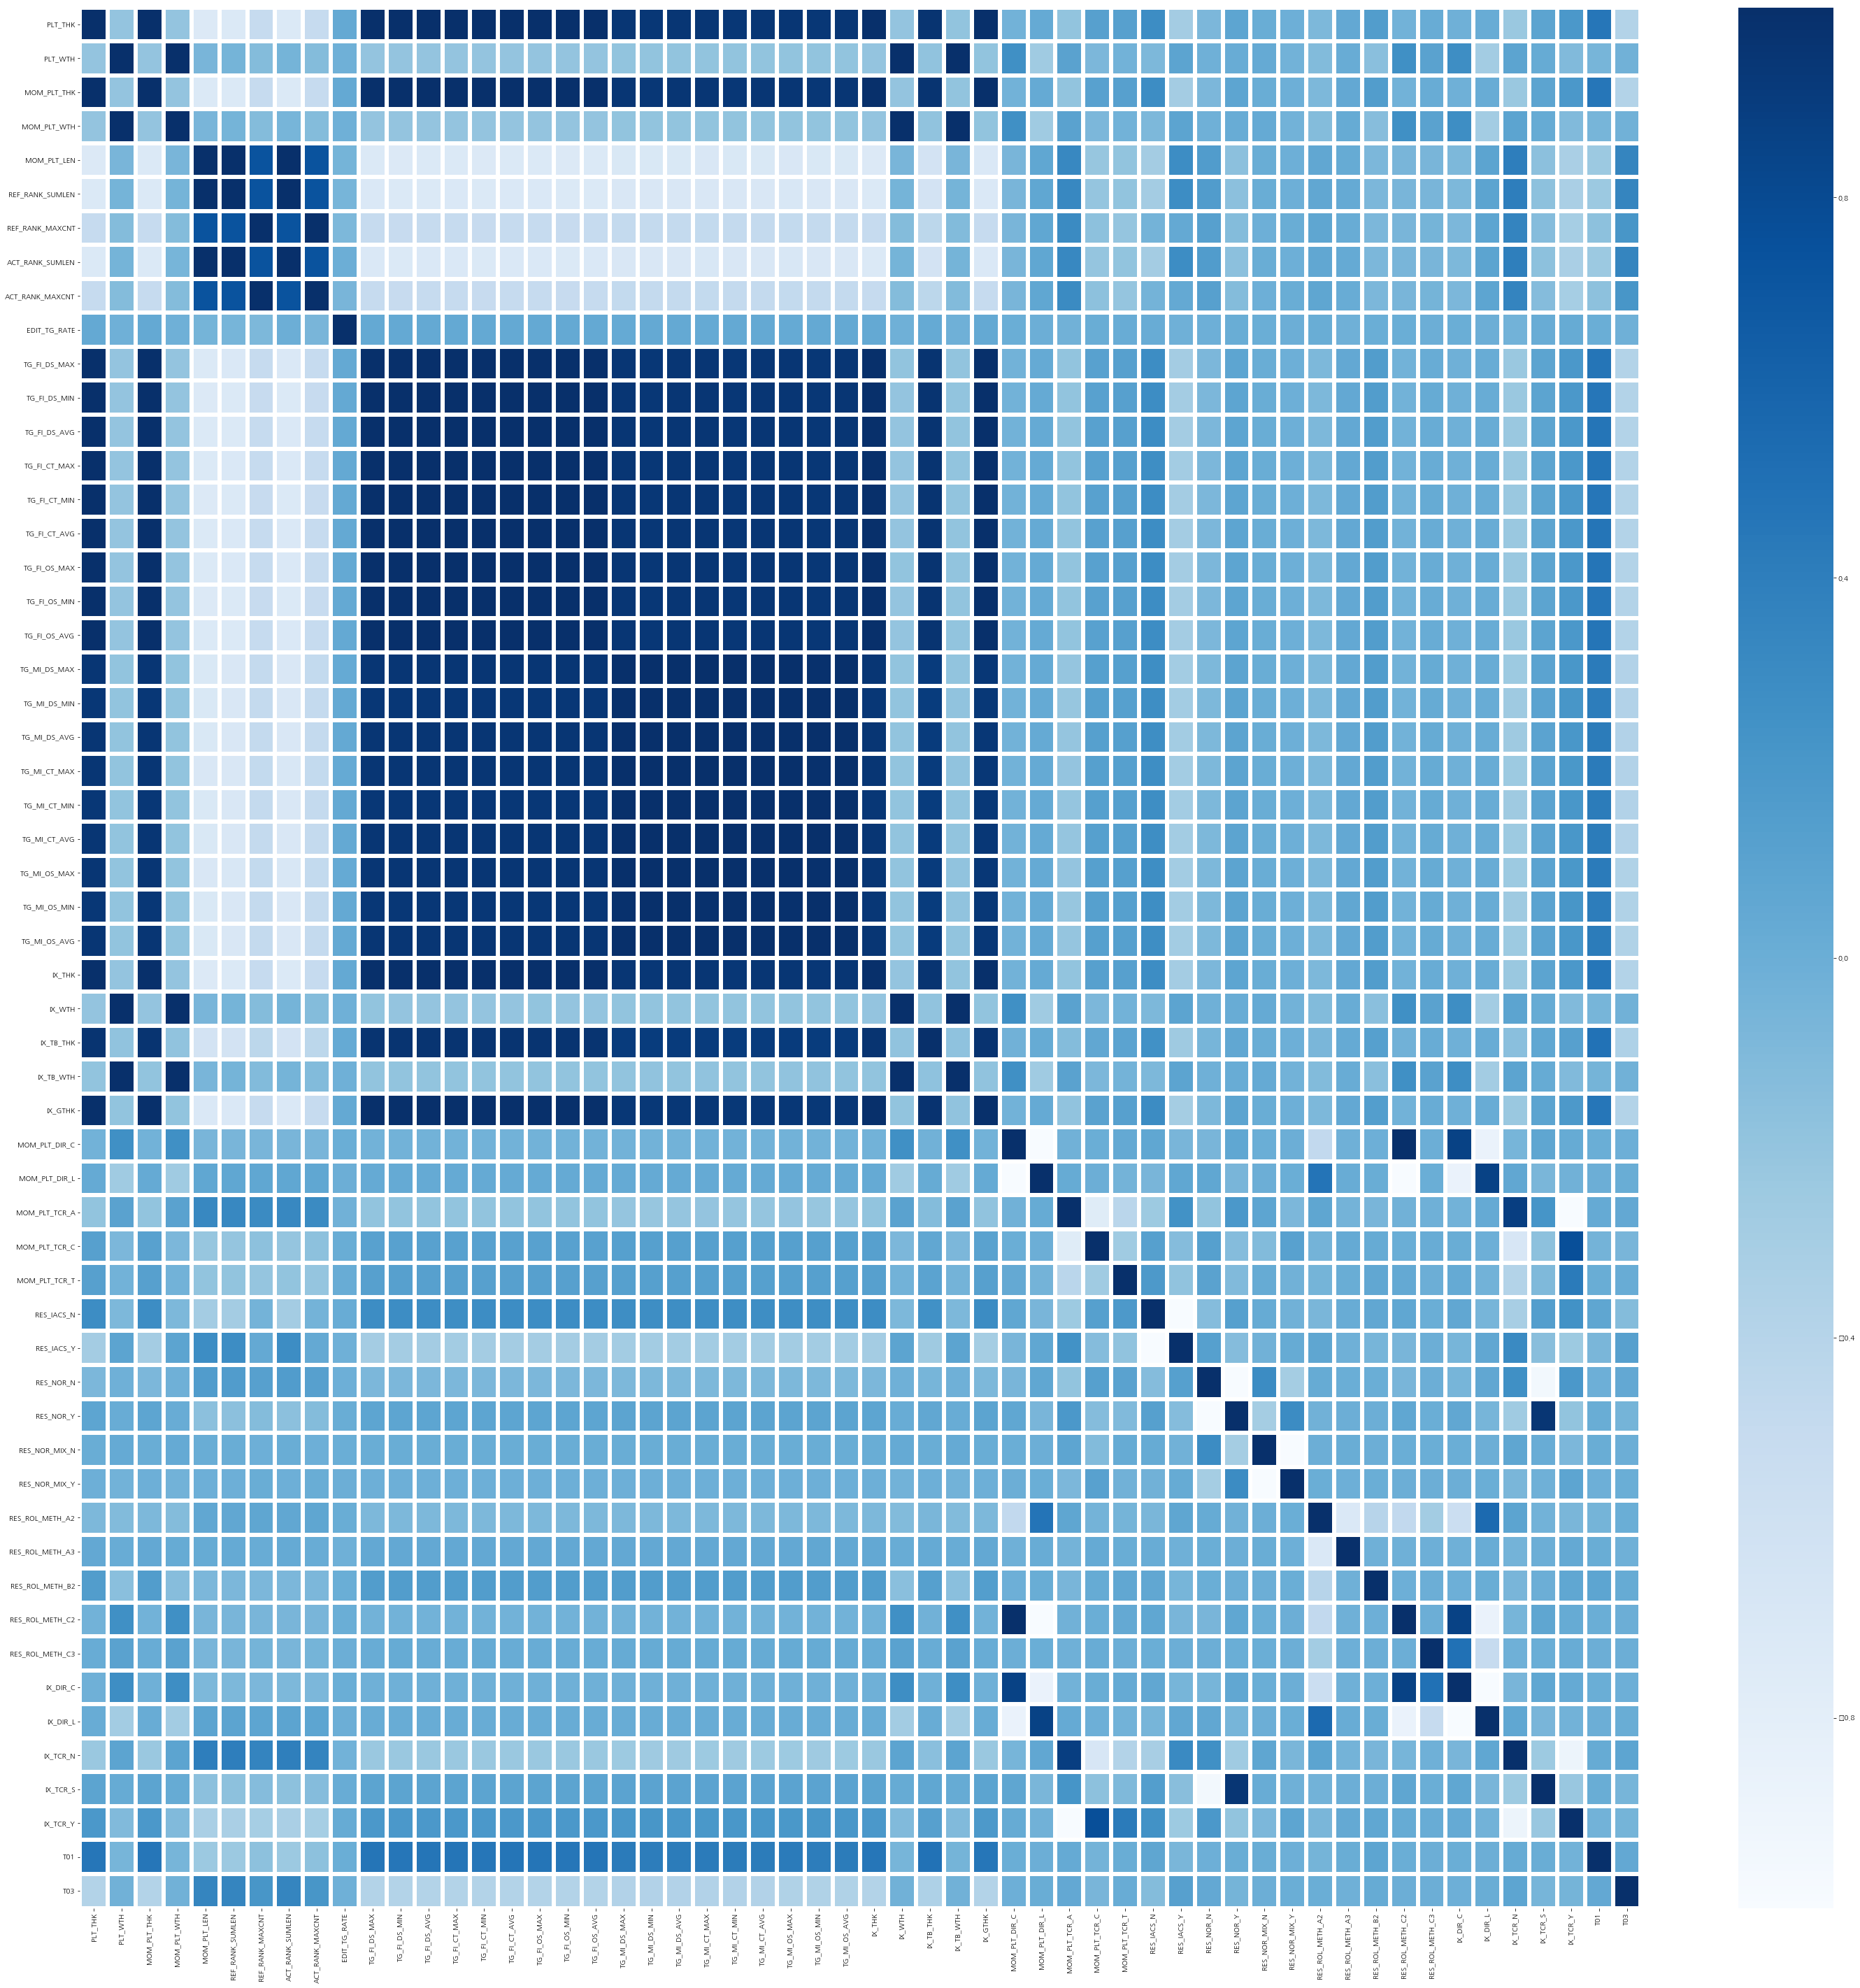

In [0]:
%matplotlib inline
plt.figure(figsize=(50,50))
B_heatmap = sns.heatmap(data=X_vif_y.corr(), annot=False,
                        linewidths=5, cmap='Blues')
B_heatmap.get_figure().savefig("B_heatmap1.png")

In [0]:
X.corr()

,PLT_THK,PLT_WTH,MOM_PLT_THK,MOM_PLT_WTH,MOM_PLT_LEN,REF_RANK_SUMLEN,REF_RANK_MAXCNT,ACT_RANK_SUMLEN,ACT_RANK_MAXCNT,EDIT_TG_RATE,...,TG_MI_CT_MIN,TG_MI_CT_AVG,TG_MI_OS_MAX,TG_MI_OS_MIN,TG_MI_OS_AVG,IX_THK,IX_WTH,IX_TB_THK,IX_TB_WTH,IX_GTHK
PLT_THK,1.000000,-0.198401,0.999932,-0.199971,-0.719337,-0.712551,-0.498215,-0.711886,-0.498130,0.039831,...,0.942221,0.947500,0.947006,0.939779,0.947069,0.999933,-0.197215,0.965272,-0.192909,0.995860
PLT_WTH,-0.198401,1.000000,-0.197624,0.999365,-0.064785,-0.052574,-0.117938,-0.053484,-0.118572,-0.018544,...,-0.192657,-0.193072,-0.192283,-0.190940,-0.192666,-0.197235,0.999020,-0.182246,0.996030,-0.192585
MOM_PLT_THK,0.999932,-0.197624,1.000000,-0.199169,-0.718395,-0.711634,-0.498888,-0.710969,-0.498803,0.039790,...,0.942055,0.947372,0.946904,0.939600,0.946939,0.999878,-0.196415,0.966088,-0.192112,0.996022
MOM_PLT_WTH,-0.199971,0.999365,-0.199169,1.000000,-0.065503,-0.053907,-0.118739,-0.054836,-0.119384,-0.018956,...,-0.194046,-0.194492,-0.193715,-0.192354,-0.194092,-0.198810,0.998363,-0.183910,0.995336,-0.194274
MOM_PLT_LEN,-0.719337,-0.064785,-0.718395,-0.065503,1.000000,0.997626,0.734321,0.996405,0.734281,-0.053819,...,-0.700279,-0.697807,-0.693979,-0.701519,-0.698430,-0.719756,-0.064532,-0.632228,-0.065283,-0.710601
REF_RANK_SUMLEN,-0.712551,-0.052574,-0.711634,-0.053907,0.997626,1.000000,0.733218,0.998726,0.733140,-0.054885,...,-0.693644,-0.691227,-0.687465,-0.694807,-0.691836,-0.712993,-0.052310,-0.626598,-0.053018,-0.703838
REF_RANK_MAXCNT,-0.498215,-0.117938,-0.498888,-0.118739,0.734321,0.733218,1.000000,0.729974,0.999286,-0.088535,...,-0.488292,-0.486074,-0.482965,-0.489317,-0.486402,-0.499285,-0.118093,-0.434719,-0.113420,-0.493695
ACT_RANK_SUMLEN,-0.711886,-0.053484,-0.710969,-0.054836,0.996405,0.998726,0.729974,1.000000,0.731160,-0.005535,...,-0.692967,-0.690555,-0.686801,-0.694099,-0.691159,-0.712322,-0.053193,-0.626075,-0.053895,-0.703174
ACT_RANK_MAXCNT,-0.498130,-0.118572,-0.498803,-0.119384,0.734281,0.733140,0.999286,0.731160,1.000000,-0.063508,...,-0.488188,-0.485972,-0.482864,-0.489199,-0.486297,-0.499201,-0.118713,-0.434667,-0.114033,-0.493609
EDIT_TG_RATE,0.039831,-0.018544,0.039790,-0.018956,-0.053819,-0.054885,-0.088535,-0.005535,-0.063508,1.000000,...,0.039300,0.039116,0.038846,0.039936,0.039230,0.039979,-0.018051,0.034152,-0.017867,0.039552


## VIF 값을 토대로 다중공선성 제거

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_features=list(X_vif)

In [0]:
thresh = 30
for i in np.arange(0, len(x_features)):
    print(len(x_features))
    vif = [variance_inflation_factor(X_vif[x_features].values, ix)\
          for ix in range(X_vif[x_features].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("vif: ", vif)
        print("dropping \'" + X_vif[x_features].columns[maxloc] +'\' at index : ' + str(maxloc))
        del x_features[maxloc]
        
    else:
        break
print("Final variables: ", x_features)
print("vif: ", vif)

54


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif:  [17800.35302176498, 1627.9482501740777, 57513.4750568814, 1085.200877074352, 268.6596867178781, 9469.115647843599, 1268.9341960081279, 9176.02469049558, 1263.1873903886362, 23.493172784312073, 90376.32326863422, 98492.34122829126, 278459.11095144844, 91328.07725351959, 103356.381713515, 255819.70139568113, 92599.14319403657, 103075.27805452954, 296961.4674409769, 18099.25697452037, 1526.2995740068507, 35248.59865199955, 13732.57640499583, 1845.6634875300851, 30501.157369033208, 6213.414921048036, 704.2524430902812, 15466.381887989532, 8903.29605616911, 749.6459555812327, 27.284759321269785, 186.06528230792142, 187.48165226748236, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
dropping 'MOM_PLT_DIR_C' at index : 33
53
vif:  [17800.35302176498, 1627.9482501740777, 57513.4750568814, 1085.200877074352, 268.6596867178781, 9469.115647843599, 1268.9341960081279, 9176.02469049558, 1263.1873903886362, 23.493172784312073, 90376.3232

vif:  [17799.486161272616, 1627.7261732238346, 57460.99326915555, 1084.888054748093, 268.62626620295066, 9468.627397602786, 1268.918688221407, 9175.804713010706, 1263.175340382334, 23.49280313397073, 82416.26237744174, 92085.3269790484, 195220.11273929352, 85147.2850493956, 91996.86629098211, 195955.94185772582, 58962.81355878441, 67134.36160498066, 18099.253777683167, 1526.2467333111465, 35239.137522766054, 13732.461560548685, 1845.5404977374249, 30501.012496899206, 6212.513456952858, 704.2466572928657, 15462.089934531417, 8903.077411557164, 749.6441354393951, 27.213536519000307, 186.06414454481808, 187.4097978416046, 233.23490315510443, 1.4168057858466534, 1.5730581754891095, 1.0228476638288324, 1.0870620537145095, 1.3016361669774061, 78.08620769972622, 310.0500146991571, 45027.10344058737, 5412.778511162115, 41176.15892412612]
dropping 'TG_FI_CT_AVG' at index : 15
42
vif:  [17797.0794879803, 1627.3175347362605, 57341.84449842678, 1084.3863636763256, 268.1219088442097, 9468.061763982

vif:  [7721.707325777174, 1822.2978914327728, 7082.563211622173, 5638.400335134028, 5116.304785183631, 5621.928891991247, 228.25893609214626, 9650.880509802102, 11122.454266973484, 15468.60610810946, 2478.6831250283617, 19063.063482690883, 3842.7975174630124, 31840.257585474013, 12343.463669914203, 1507.2607587813523, 28629.66520433579, 10297.49517898434, 12604.04625930414, 48.030459814519425, 4363.611623319894, 399.998667639668, 17824.141879248396, 1.4934621582889618, 2.452878869325053, 1.0280684439811651, 1.086767410286419, 1.1341934771090603, 78.42307597176882, 17806.040833498697, 1.2854593933378804, 2.998507549981514]
dropping 'TG_MI_CT_AVG' at index : 13
31
vif:  [7721.706929675487, 1821.612857910749, 7081.9152018718305, 5638.386129369588, 5116.3047622247805, 5621.90796479154, 228.2547844155315, 9640.49650146326, 11097.815155030774, 15097.734332715545, 2473.6530190218714, 11255.78857655823, 2872.406193896202, 6886.356827039916, 1100.3396131740644, 10222.110406827518, 10294.4651575

vif:  [15.264211601636323, 10.735680585895134, 24.036970584435497, 68.50821473117213, 158.81534276513332, 142.56694330656657, 32.94217641321034, 1.4395365237507864, 2.1335192670091545, 1.0250007783164325, 1.0524754457445997, 1.056809119758867, 1.1936663732106563, 39.713273495572, 1.2308437796323166, 2.7808036066892807]
dropping 'TG_MI_OS_MAX' at index : 4
15
vif:  [15.263597939643194, 10.735651389101285, 23.969768584000423, 66.93635763224529, 19.62082715975566, 32.79144218716626, 1.4394385836493908, 2.133518634974437, 1.0249780398411663, 1.052435428233143, 1.0567977611042243, 1.1933136368765571, 39.63139817630217, 1.230736589294447, 2.779986069146382]
dropping 'TG_FI_CT_MAX' at index : 3
14
vif:  [15.259209141066473, 10.732552554806949, 22.39366881184353, 14.07703663689968, 9.799610610812048, 1.4381197175188511, 2.1334245718410187, 1.0246853956950888, 1.0468327844200283, 1.0493813131895726, 1.1785085460665674, 35.62409512341536, 1.2261311117284024, 2.7302204829528853]
dropping 'IX_DIR_

In [0]:
B_df = pd.concat([X_vif[x_features],y], axis=1)
#B_df.to_csv("b.csv",index=False)

## 다시 상관 분석

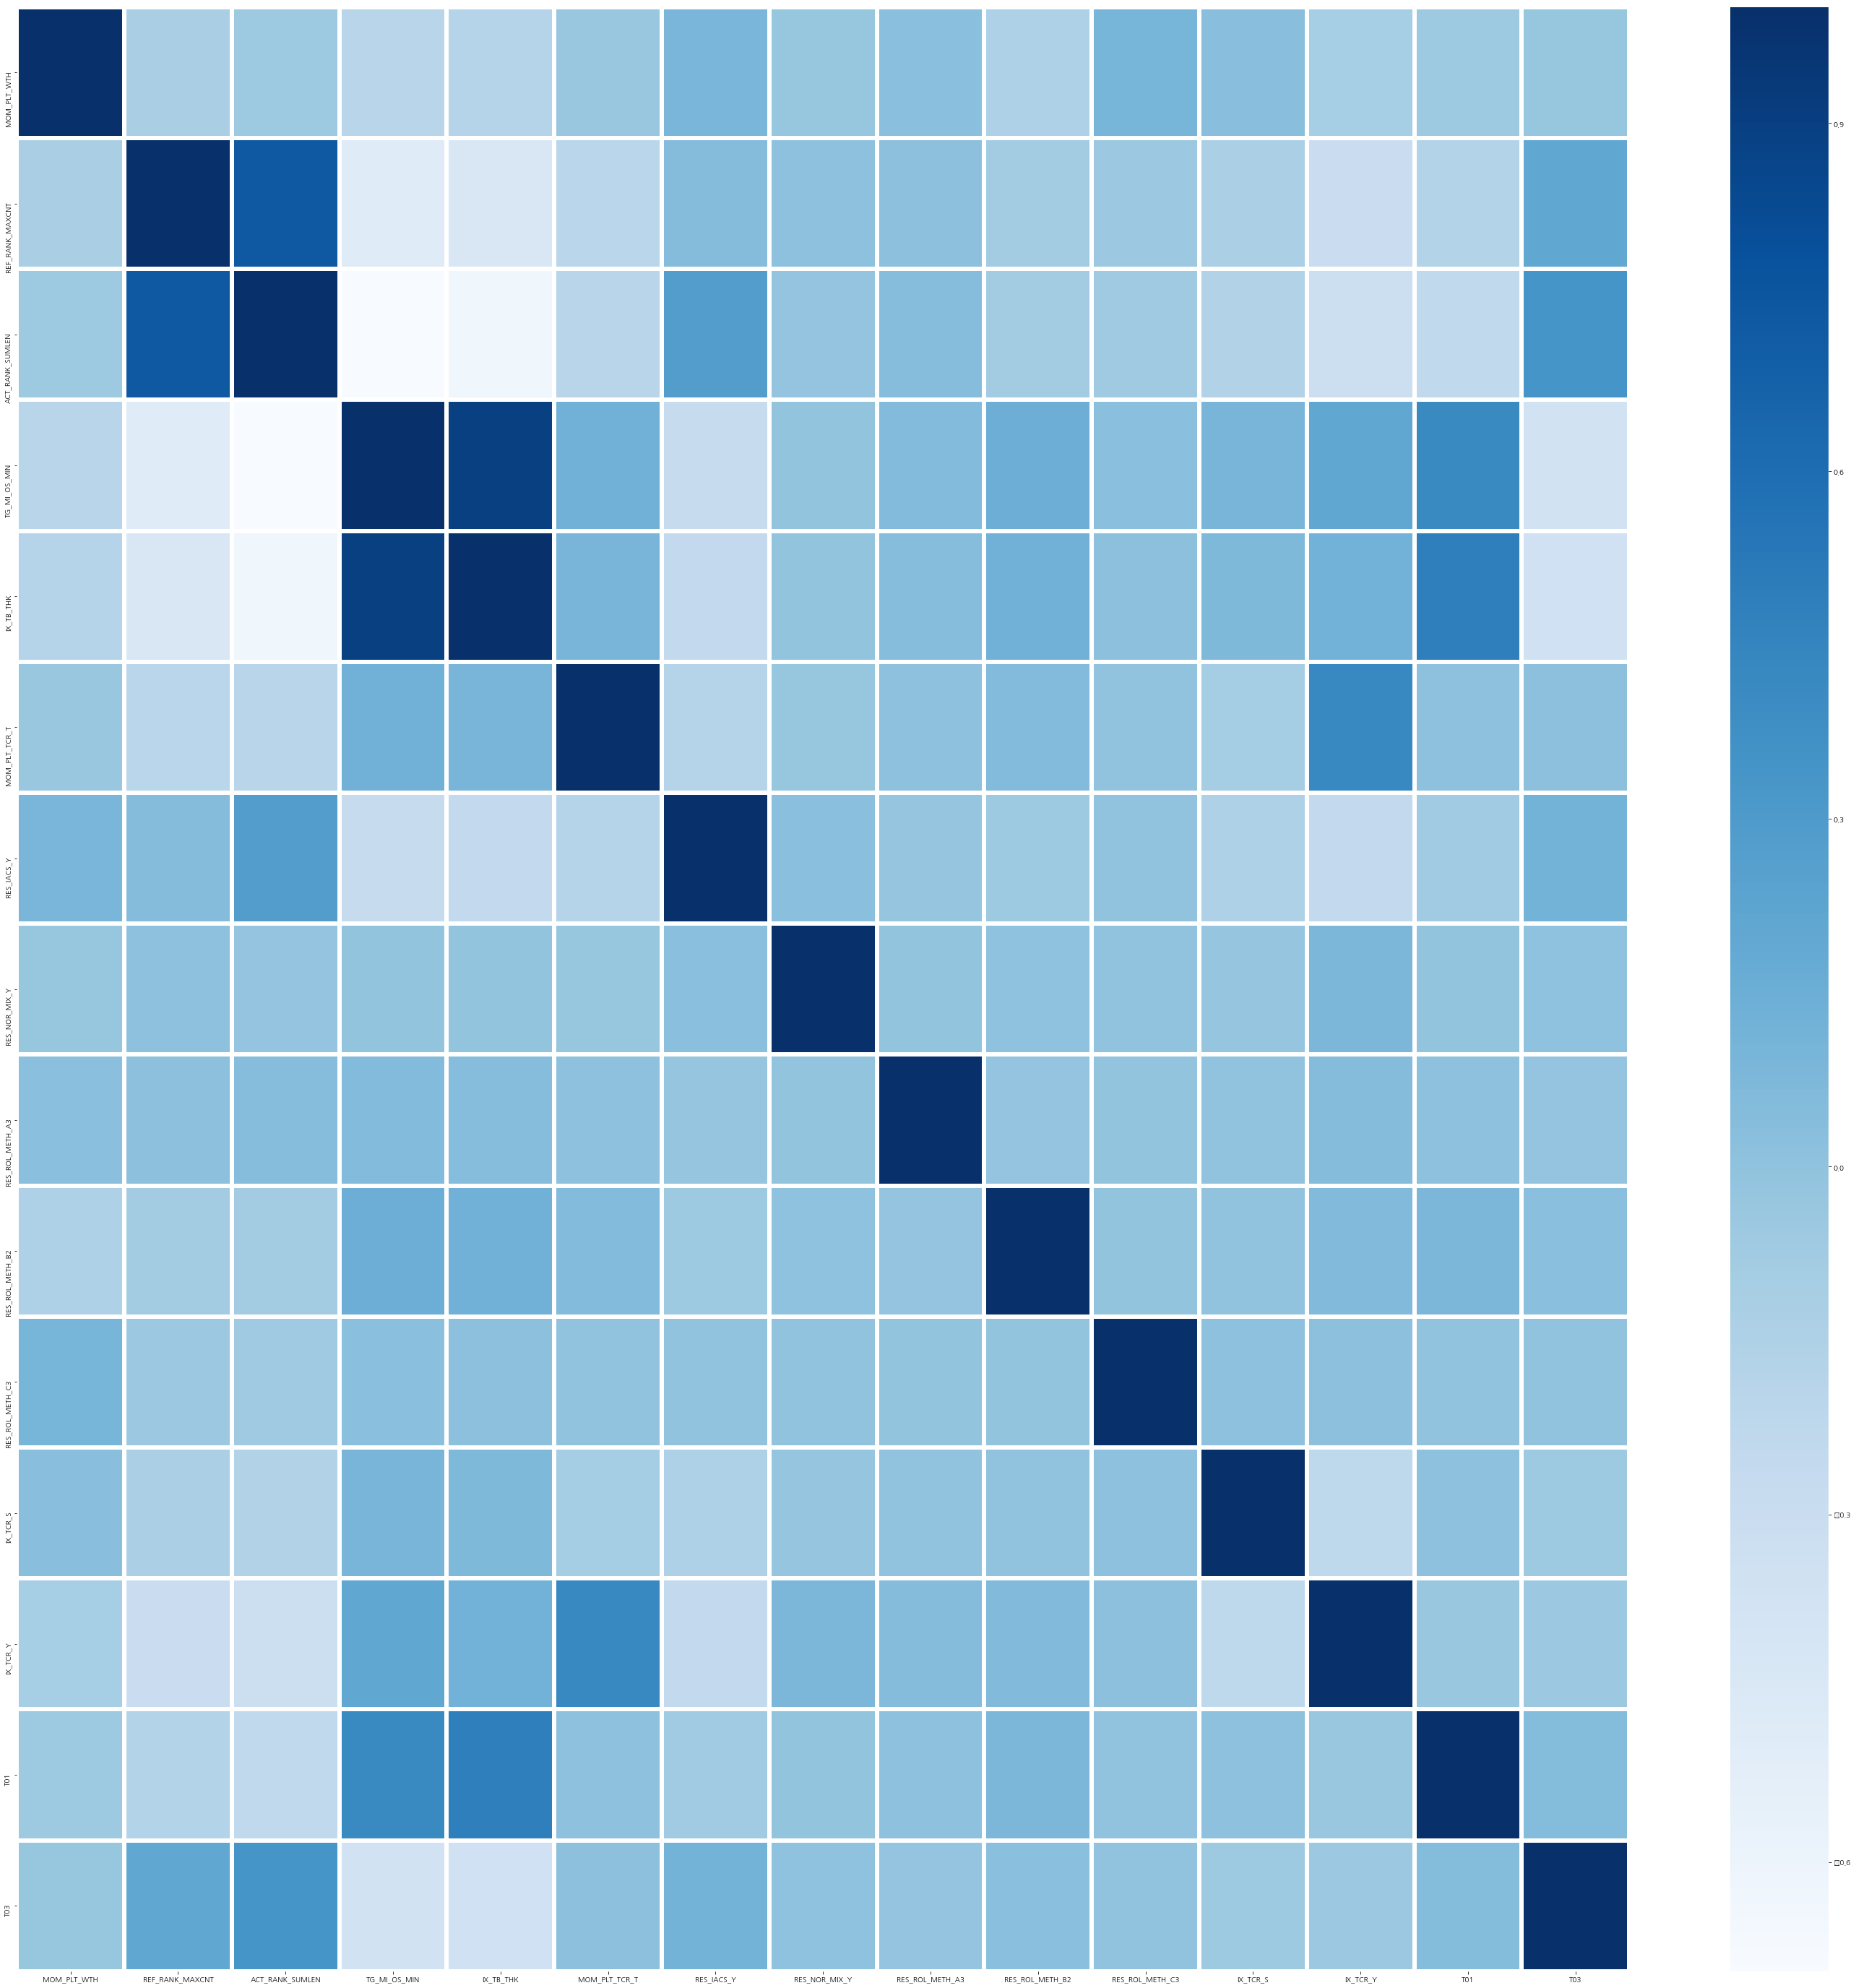

In [0]:
%matplotlib inline
plt.figure(figsize=(50,50))
B_heatmap = sns.heatmap(data=B_df.corr(), annot=False,
                        linewidths=5, cmap='Blues')
B_heatmap.get_figure().savefig("B_heatmap2.png")

In [0]:
B_df.corr()

,MOM_PLT_WTH,REF_RANK_MAXCNT,ACT_RANK_SUMLEN,TG_MI_OS_MIN,IX_TB_THK,MOM_PLT_TCR_T,RES_IACS_Y,RES_NOR_MIX_Y,RES_ROL_METH_A3,RES_ROL_METH_B2,RES_ROL_METH_C3,IX_TCR_S,IX_TCR_Y,T01,T03
MOM_PLT_WTH,1.000000,-0.118739,-0.054836,-0.192354,-0.183910,-0.035322,0.092483,-0.031559,0.026381,-0.139774,0.103040,0.030780,-0.102575,-0.057431,-0.030087
REF_RANK_MAXCNT,-0.118739,1.000000,0.729974,-0.489317,-0.434719,-0.204925,0.045430,0.012463,0.017116,-0.083395,-0.051182,-0.128332,-0.297382,-0.167798,0.211317
ACT_RANK_SUMLEN,-0.054836,0.729974,1.000000,-0.694099,-0.626075,-0.192545,0.284360,-0.015338,0.034874,-0.082306,-0.064401,-0.164485,-0.322043,-0.241383,0.343799
TG_MI_OS_MIN,-0.192354,-0.489317,-0.694099,1.000000,0.898584,0.129565,-0.275138,-0.009925,0.054977,0.150579,0.025384,0.096986,0.211545,0.412735,-0.364274
IX_TB_THK,-0.183910,-0.434719,-0.626075,0.898584,1.000000,0.099978,-0.257230,-0.011979,0.036267,0.129272,0.018400,0.067276,0.120908,0.485254,-0.349498
MOM_PLT_TCR_T,-0.035322,-0.204925,-0.192545,0.129565,0.099978,1.000000,-0.181552,-0.029502,0.011614,0.055179,-0.002536,-0.096701,0.427128,0.008799,0.020391
RES_IACS_Y,0.092483,0.045430,0.284360,-0.275138,-0.257230,-0.181552,1.000000,0.024143,-0.020792,-0.054875,-0.003421,-0.141575,-0.245608,-0.073838,0.119307
RES_NOR_MIX_Y,-0.031559,0.012463,-0.015338,-0.009925,-0.011979,-0.029502,0.024143,1.000000,-0.008323,0.003954,-0.005111,-0.019327,0.085366,-0.011567,0.004067
RES_ROL_METH_A3,0.026381,0.017116,0.034874,0.054977,0.036267,0.011614,-0.020792,-0.008323,1.000000,-0.016609,-0.011375,-0.002821,0.043091,0.011651,-0.017699
RES_ROL_METH_B2,-0.139774,-0.083395,-0.082306,0.150579,0.129272,0.055179,-0.054875,0.003954,-0.016609,1.000000,-0.006409,-0.005359,0.066430,0.084093,0.025858


#분석 모델

## H2O 패키지로 분석

In [0]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
h2o.init()

b=h2o.H2OFrame(B_df)
#b=h2o.import_file(path="b.csv") 

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\COM\AppData\Local\Temp\tmp1lknoxwr
  JVM stdout: C:\Users\COM\AppData\Local\Temp\tmp1lknoxwr\h2o_COM_started_from_python.out
  JVM stderr: C:\Users\COM\AppData\Local\Temp\tmp1lknoxwr\h2o_COM_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Seoul
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_COM_m7squx
H2O cluster total nodes:,1
H2O cluster free memory:,3.540 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
b=b.drop(['T03']) #종속변수는 T01 채택

In [0]:
b.show()

MOM_PLT_WTH,REF_RANK_MAXCNT,ACT_RANK_SUMLEN,TG_MI_OS_MIN,IX_TB_THK,MOM_PLT_TCR_T,RES_IACS_Y,RES_NOR_MIX_Y,RES_ROL_METH_A3,RES_ROL_METH_B2,RES_ROL_METH_C3,IX_TCR_S,IX_TCR_Y,T01
2283,2,18000,25.29,25,0,1,0,0,0,0,1,0,0.06
2512,7,46176,14.07,15,0,1,0,0,0,0,0,0,-0.03
3582,3,39120,12.17,12,0,1,0,0,0,0,0,1,0.11
4359,10,42100,9.98,12,0,0,0,0,0,0,0,0,0.08
2128,4,32190,18.97,21,0,0,1,0,0,0,0,1,0.12
2124,4,33150,15.96,18,0,0,0,0,0,0,0,1,0.1
3160,1,13310,50.2,50,1,0,0,0,0,0,0,1,0.01
2393,2,23940,25.42,30,1,0,0,0,0,0,0,1,-0.13
2411,6,37320,10.23,12,0,1,1,0,0,0,0,1,0.13
2540,3,26597,8.92,9,0,0,0,0,0,0,1,0,0.03


## 학습, 검증, 평가 집합 생성

In [0]:
r=b[0].runif()                                                 # 한 행당 난수 생성

train=b[ r < 0.6 ]                                             # train set 60%
valid=b[ (0.6 <= r) & (r < 0.9) ]                              # validation set 30%
test=b[ 0.9 <= r ]                                            # test set 10%


#train = h2o.import_file(path="train.csv")                               # train set 60%
#valid = h2o.import_file(path="valid.csv")                               # validation set 30%
#test = h2o.import_file(path="test.csv")                                 # test set 10% 

In [0]:
#h2o.export_file(train,"train.csv")                               # train set 60%
#h2o.export_file(valid,"valid.csv")                                  # validation set 30%
#h2o.export_file(test,"test.csv")                                      # test set 10% 

Export File progress: |███████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


## 적합한 모델 자동 탐색

In [0]:
b_x=b.drop('T01')
x_features=b_x.col_names
x_features

['MOM_PLT_WTH',
 'REF_RANK_MAXCNT',
 'ACT_RANK_SUMLEN',
 'TG_MI_OS_MIN',
 'IX_TB_THK',
 'MOM_PLT_TCR_T',
 'RES_IACS_Y',
 'RES_NOR_MIX_Y',
 'RES_ROL_METH_A3',
 'RES_ROL_METH_B2',
 'RES_ROL_METH_C3',
 'IX_TCR_S',
 'IX_TCR_Y']

In [0]:
aml=H2OAutoML(max_models = 10, seed = 1)
aml.train(x=x_features, y='T01', training_frame=train, validation_frame=valid)  #학습 set을 train set으로, 검증 set을 validation set으로

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
aml_list=aml.leaderboard

In [0]:
aml_list.head(rows=aml_list.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190212_114800,0.0177361,0.133177,0.0177361,0.0504956,nan
StackedEnsemble_BestOfFamily_AutoML_20190212_114800,0.0178083,0.133448,0.0178083,0.0511206,nan
GBM_4_AutoML_20190212_114800,0.0179603,0.134016,0.0179603,0.0524925,nan
GBM_3_AutoML_20190212_114800,0.0180763,0.134448,0.0180763,0.0531203,nan
GBM_2_AutoML_20190212_114800,0.0181627,0.134769,0.0181627,0.0536218,nan
GBM_5_AutoML_20190212_114800,0.0181831,0.134845,0.0181831,0.0518801,nan
XRT_1_AutoML_20190212_114800,0.018707,0.136774,0.018707,0.0503937,nan
GBM_1_AutoML_20190212_114800,0.0187616,0.136973,0.0187616,0.0539748,nan
DRF_1_AutoML_20190212_114800,0.0188824,0.137413,0.0188824,0.0505416,nan
DeepLearning_1_AutoML_20190212_114800,0.019461,0.139503,0.019461,0.0571366,nan


## Gradient Boosting, Random Forest, Deep Learning 으로 분석

## Grid Search 전

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

### Gradient Boosting

In [0]:
gbm=H2OGradientBoostingEstimator()                                    # 디폴트 파라미터 설정으로 모델 돌리기
gbm.train(x=x_features, y='T01', training_frame=train, validation_frame=valid)  #학습 set을 train set으로, 검증 set을 validation set으로
gbm                                                                 
gbm.show()                                                          # 모델 요약
gbm.model_performance()                                             # train set의 모델 성능
gbm.model_performance(valid=True)                                   # validation set 모델 성능
gbm.model_performance(test_data=test)                               # test set의 모델 성능    

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1549939613902_20


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.02001869483584741
RMSE: 0.14148743702480235
MAE: 0.0536720758258457
RMSLE: NaN
Mean Residual Deviance: 0.02001869483584741

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.014582690271211606
RMSE: 0.12075881032542349
MAE: 0.05370560642524407
RMSLE: NaN
Mean Residual Deviance: 0.014582690271211606
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 14:44:12,0.000 sec,0.0,0.1709917,0.0679786,0.0292382,0.1512132,0.0676775,0.0228654
,2019-02-12 14:44:12,0.037 sec,1.0,0.1665939,0.0660268,0.0277535,0.1464094,0.0657096,0.0214357
,2019-02-12 14:44:12,0.070 sec,2.0,0.1629228,0.0643782,0.0265438,0.1423966,0.0640516,0.0202768
,2019-02-12 14:44:12,0.097 sec,3.0,0.1598845,0.0629418,0.0255631,0.1390533,0.0626072,0.0193358
,2019-02-12 14:44:12,0.122 sec,4.0,0.1573666,0.0616969,0.0247642,0.1362812,0.0613467,0.0185726
---,---,---,---,---,---,---,---,---,---
,2019-02-12 14:44:13,1.277 sec,46.0,0.1416803,0.0537444,0.0200733,0.1207960,0.0537640,0.0145917
,2019-02-12 14:44:13,1.315 sec,47.0,0.1416619,0.0537247,0.0200681,0.1207877,0.0537488,0.0145897
,2019-02-12 14:44:13,1.344 sec,48.0,0.1415414,0.0536940,0.0200340,0.1207758,0.0537190,0.0145868
,2019-02-12 14:44:13,1.371 sec,49.0,0.1415269,0.0536840,0.0200299,0.1207705,0.0537100,0.0145855



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,2757.6855469,1.0,0.6607211
TG_MI_OS_MIN,796.9191895,0.2889812,0.1909360
ACT_RANK_SUMLEN,234.4518585,0.0850176,0.0561729
MOM_PLT_WTH,195.1322784,0.0707594,0.0467523
MOM_PLT_TCR_T,131.6983948,0.0477569,0.0315540
IX_TCR_Y,23.4437389,0.0085012,0.0056169
RES_ROL_METH_A3,10.0926867,0.0036598,0.0024181
RES_IACS_Y,7.2721891,0.0026371,0.0017424
IX_TCR_S,7.0146956,0.0025437,0.0016807
REF_RANK_MAXCNT,4.1237984,0.0014954,0.0009880



ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.006091594306180622
RMSE: 0.07804866626778847
MAE: 0.05206633963065418
RMSLE: 0.06918903243196373
Mean Residual Deviance: 0.006091594306180622


In [0]:
gbm.actual_params

{'model_id': 'GBM_model_python_1549939613902_20',
 'training_frame': 'py_19_sid_873d',
 'validation_frame': 'py_20_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -6909839362733146336,
 'build_tree_one_node': False,
 'learn_rate': 0.

In [0]:
gbm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_model_python_1549939613902_20',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_model_python_1549939613902_20'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_19_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_19_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_20_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_20_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': 

### Random Forest

In [0]:
rf=H2ORandomForestEstimator()                                   # 디폴트 파라미터 설정으로 모델 돌리기
rf.train(x=x_features, y='T01', training_frame=train, validation_frame=valid)  #학습 set을 train set으로, 검증 set을 validation set으로
rf                                                                 
rf.show()                                                          # 모델 요약
rf.model_performance()                                             # train set의 모델 성능
rf.model_performance(valid=True)                                   # validation set 모델 성능
rf.model_performance(test_data=test)                               # test set의 모델 성능

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1549939613902_21


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.023292739970675932
RMSE: 0.15261959235522787
MAE: 0.050890990499102944
RMSLE: NaN
Mean Residual Deviance: 0.023292739970675932

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.014373642513845352
RMSE: 0.11989012684055911
MAE: 0.049214812833879414
RMSLE: NaN
Mean Residual Deviance: 0.014373642513845352
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 14:46:01,0.001 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-02-12 14:46:01,0.175 sec,1.0,0.1814101,0.0612614,0.0329096,0.1904149,0.0613460,0.0362578
,2019-02-12 14:46:01,0.318 sec,2.0,0.1844326,0.0602645,0.0340154,0.1440935,0.0555461,0.0207629
,2019-02-12 14:46:02,0.485 sec,3.0,0.1873060,0.0594236,0.0350835,0.1411450,0.0539154,0.0199219
,2019-02-12 14:46:02,0.642 sec,4.0,0.2036544,0.0589000,0.0414751,0.1370087,0.0528946,0.0187714
---,---,---,---,---,---,---,---,---,---
,2019-02-12 14:46:04,3.334 sec,17.0,0.1623696,0.0529706,0.0263639,0.1234594,0.0501332,0.0152422
,2019-02-12 14:46:05,3.574 sec,18.0,0.1618416,0.0527690,0.0261927,0.1231030,0.0500451,0.0151544
,2019-02-12 14:46:05,3.836 sec,19.0,0.1590083,0.0525730,0.0252837,0.1225408,0.0499389,0.0150163
,2019-02-12 14:46:09,7.864 sec,45.0,0.1523935,0.0510206,0.0232238,0.1198866,0.0493228,0.0143728



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
TG_MI_OS_MIN,23133.3359375,1.0,0.3003993
ACT_RANK_SUMLEN,17540.0742188,0.7582164,0.2277676
IX_TB_THK,13871.375,0.5996271,0.1801275
MOM_PLT_WTH,13422.2861328,0.5802140,0.1742959
REF_RANK_MAXCNT,2855.4987793,0.1234365,0.0370802
RES_IACS_Y,2303.2932129,0.0995660,0.0299095
MOM_PLT_TCR_T,1432.3686523,0.0619179,0.0186001
IX_TCR_S,941.1156616,0.0406822,0.0122209
IX_TCR_Y,786.0843506,0.0339806,0.0102077
RES_ROL_METH_A3,348.4112549,0.0150610,0.0045243



ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.005665913213709656
RMSE: 0.07527226058588686
MAE: 0.047469371764521075
RMSLE: 0.08718414779232428
Mean Residual Deviance: 0.005665913213709656


In [0]:
rf.actual_params

{'model_id': 'DRF_model_python_1549939613902_21',
 'training_frame': 'py_19_sid_873d',
 'validation_frame': 'py_20_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 50,
 'max_depth': 20,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -1964096003575733899,
 'build_tree_one_node': False,
 'mtries': -1,
 '

In [0]:
rf.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_model_python_1549939613902_21',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_model_python_1549939613902_21'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_19_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_19_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_20_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_20_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': 

### Deep Learning

In [0]:
dl=H2ODeepLearningEstimator()                                      # 디폴트 파라미터 설정으로 모델 돌리기
dl.train(x=x_features, y='T01', training_frame=train, validation_frame=valid)  #학습 set을 train set으로, 검증 set을 validation set으로
dl                                                                
dl.show()                                                          # 모델 요약 
dl.model_performance()                                             # train set의 모델 성능
dl.model_performance(valid=True)                                   # validation set의 모델 성능
dl.model_performance(test_data=test)                               # test set의 모델 성능   

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1549939613902_22


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.013169611534311397
RMSE: 0.11475892790677071
MAE: 0.05509724051869595
RMSLE: NaN
Mean Residual Deviance: 0.013169611534311397

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.01585548563047354
RMSE: 0.12591856745720045
MAE: 0.056088283835718844
RMSLE: NaN
Mean Residual Deviance: 0.01585548563047354
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2019-02-12 14:49:23,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-12 14:49:26,3.460 sec,28378 obs/sec,1.0,1,86015.0,0.1141801,0.0130371,0.0549808,0.3964800,0.1259715,0.0158688,0.0561424,0.3059888
,2019-02-12 14:49:31,8.672 sec,44257 obs/sec,4.0,4,344060.0,0.1242636,0.0154415,0.0579657,0.2851763,0.1313675,0.0172574,0.0583045,0.2452591
,2019-02-12 14:49:38,15.074 sec,50103 obs/sec,8.0,8,688120.0,0.1115210,0.0124369,0.0545869,0.4242634,0.1268305,0.0160860,0.0562073,0.2964919
,2019-02-12 14:49:41,18.545 sec,51309 obs/sec,10.0,10,860150.0,0.1147589,0.0131696,0.0550972,0.3903456,0.1259186,0.0158555,0.0560883,0.3065721


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
MOM_PLT_WTH,1.0,1.0,0.1027949
RES_IACS_Y,0.9547924,0.9547924,0.0981478
IX_TCR_Y,0.8371314,0.8371314,0.0860528
MOM_PLT_TCR_T,0.8246171,0.8246171,0.0847664
TG_MI_OS_MIN,0.8172213,0.8172213,0.0840062
RES_ROL_METH_C3,0.8127205,0.8127205,0.0835435
ACT_RANK_SUMLEN,0.7561265,0.7561265,0.0777260
RES_NOR_MIX_Y,0.7545530,0.7545530,0.0775642
REF_RANK_MAXCNT,0.6889350,0.6889350,0.0708190
IX_TB_THK,0.6668800,0.6668800,0.0685519



ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.007225742229796843
RMSE: 0.08500436594550213
MAE: 0.054359759109875554
RMSLE: 0.07367467359704716
Mean Residual Deviance: 0.007225742229796843


In [0]:
dl.actual_params

{'model_id': 'DeepLearning_model_python_1549939613902_22',
 'training_frame': 'py_19_sid_873d',
 'validation_frame': 'py_20_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'weights_column': None,
 'offset_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'checkpoint': None,
 'pretrained_autoencoder': None,
 'overwrite_with_best_model': True,
 'use_all_factor_levels': True,
 'standardize': True,
 'activation': 'Rectifier',
 'hidden': [200, 200],
 'epochs': 10.0,
 'train_samples_per_iteration': -2,
 'target_ratio_comm_to_comp': 0.05,
 'seed': -9055654912872430723,
 'adaptive_rate': True,
 'rho': 0.99,
 'ep

In [0]:
dl.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_model_python_1549939613902_22',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_model_python_1549939613902_22'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_19_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_19_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_20_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_20_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignm

## Grid Search 후

### Gradient Boosting

In [0]:
##1. Gradient Boosting Machine (GBM)



#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 


# 각 파라미터 값을 지정
gbm_par = {
                'learn_rate': [0.01, 0.05, 0.1],  #가능하면 낮은 학습율을 지정. 너무 낮으면 나무모형이 더 많이 필요
                'max_depth': [4, 6, 8], # 나무의 깊이. 깊을수록 더 많은 시간 소요.10 이상을 대개 깊다고 함
                'sample_rate': [0.7, 0.8],               # 행의 표집 비율. 0.7 – 0.8 이 적정
                'col_sample_rate': [0.7, 0.8]       # 열의 표집 비율. 0.7 – 0.8 이 적정
                }


gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # 학습시킬 모델
                          grid_id='gbm_grid01',                  # 그리드 탐색 ID
                          hyper_params=gbm_par,              # 앞서 지정한 하이퍼 파라미터들
                          search_criteria={"strategy": "Cartesian"}   # 탐색 기준 Cartesian: 데카르트 좌표계 검색
                          )

#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기

# 모델을 학습시키기
gbm_grid.train(x=x_features, y='T01', 
                training_frame=train,
                validation_frame=valid,
                ntrees=100,      # 이곳부터 위의 그리드 탐색 시 지정하지 않은 파라미터들 넣기 
                #타당도 검증 오차가 증가할 때까지 생성시킬 나무모형 개수  
                stopping_rounds=3,        
                stopping_tolerance=0.0005,
                seed=1)

# 모형의 성능 확인
gbm_grid_per = gbm_grid.get_grid(sort_by='RMSE',decreasing = False)
gbm_grid_per

# 가장 오차가 적은 성능 좋은 모델 찾기
best_gbm = gbm_grid_per.models[0]
best_gbm

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid01_model_33


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.018500643371824943
RMSE: 0.13601707014865796
MAE: 0.051535333813294684
RMSLE: NaN
Mean Residual Deviance: 0.018500643371824943

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.014299388927670346
RMSE: 0.11958005238195184
MAE: 0.052368644578733345
RMSLE: NaN
Mean Residual Deviance: 0.014299388927670346
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 14:47:49,1 min 4.197 sec,0.0,0.1709917,0.0679786,0.0292382,0.1512132,0.0676775,0.0228654
,2019-02-12 14:47:49,1 min 4.232 sec,1.0,0.1684648,0.0668352,0.0283804,0.1485377,0.0665298,0.0220634
,2019-02-12 14:47:49,1 min 4.264 sec,2.0,0.1661799,0.0658548,0.0276158,0.1461429,0.0655525,0.0213578
,2019-02-12 14:47:49,1 min 4.297 sec,3.0,0.1640469,0.0649390,0.0269114,0.1439192,0.0646358,0.0207127
,2019-02-12 14:47:49,1 min 4.326 sec,4.0,0.1621016,0.0640907,0.0262769,0.1418219,0.0637854,0.0201135
---,---,---,---,---,---,---,---,---,---
,2019-02-12 14:47:51,1 min 6.467 sec,75.0,0.1364142,0.0515699,0.0186088,0.1195519,0.0523609,0.0142927
,2019-02-12 14:47:51,1 min 6.496 sec,76.0,0.1362784,0.0515506,0.0185718,0.1195589,0.0523508,0.0142943
,2019-02-12 14:47:51,1 min 6.524 sec,77.0,0.1362489,0.0515334,0.0185638,0.1195225,0.0523361,0.0142856
,2019-02-12 14:47:51,1 min 6.554 sec,78.0,0.1360679,0.0515360,0.0185145,0.1195576,0.0523598,0.0142940



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,4224.2421875,1.0,0.4698812
TG_MI_OS_MIN,2693.0,0.6375108,0.2995543
ACT_RANK_SUMLEN,893.6139526,0.2115442,0.0994006
MOM_PLT_WTH,643.6267700,0.1523650,0.0715935
MOM_PLT_TCR_T,186.6212311,0.0441786,0.0207587
IX_TCR_Y,124.9632492,0.0295824,0.0139002
RES_IACS_Y,87.7664337,0.0207768,0.0097627
REF_RANK_MAXCNT,70.1473770,0.0166059,0.0078028
IX_TCR_S,24.7461929,0.0058581,0.0027526
RES_NOR_MIX_Y,14.7233877,0.0034855,0.0016377


In [0]:
best_gbm.actual_params

{'model_id': 'gbm_grid01_model_33',
 'training_frame': 'py_19_sid_873d',
 'validation_frame': 'py_20_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 100,
 'max_depth': 8,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 3,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.0005,
 'max_runtime_secs': 1.7976931348623157e+308,
 'seed': 1,
 'build_tree_one_node': False,
 'learn_rate': 0.05,
 'learn

In [0]:
best_gbm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'gbm_grid01_model_33',
   'type': 'Key<Model>',
   'URL': '/3/Models/gbm_grid01_model_33'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_19_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_19_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_20_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_20_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 's

### Random Forest

In [0]:
## 2. Random Forest (RF)


#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 


# 각 파라미터 값을 지정
rf_par = {
                'max_depth': [4, 6, 8], # 나무의 깊이. 깊을수록 더 많은 시간 소요.10 이상을 대개 깊다고 함
                'sample_rate': [0.7, 0.8],               # 행의 표집 비율. 0.7 – 0.8 이 적정
 }


rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,    # 학습시킬 모델
                          grid_id='rf_grid01',                   # 그리드 탐색 ID
                          hyper_params=rf_par,             # 앞서 지정한 하이퍼 파라미터들
                          search_criteria={"strategy": "Cartesian"}    # 탐색 기준 Cartesian: 데카르트 좌표계 검색
                          )

#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기

# 모델을 학습시키기
rf_grid.train(x=x_features, y='T01',  
                training_frame=train,
                validation_frame=valid,
                ntrees=100, # 이곳부터 위의 그리드 탐색 시 지정하지 않은 파라미터들 넣기 
                #타당도 검증 오차가 증가할 때까지 생성시킬 나무모형 개수 
                mtries = 9,# 회귀분석을 위함(독립변수 개수/3)  
                stopping_rounds=3,        
                stopping_tolerance=0.0005,
                seed=1
                )


# 모형의 성능 확인
rf_grid_per = rf_grid.get_grid(sort_by='RMSE',decreasing = False)
rf_grid_per

# 가장 오차가 적은 성능 좋은 모델 찾기
best_rf = rf_grid_per.models[0]
best_rf

drf Grid Build progress: |████████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid01_model_6


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.018865141323242924
RMSE: 0.1373504325557183
MAE: 0.054643752902900404
RMSLE: NaN
Mean Residual Deviance: 0.018865141323242924

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.014649192743697815
RMSE: 0.1210338495781152
MAE: 0.05354708191568371
RMSLE: NaN
Mean Residual Deviance: 0.014649192743697815
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 14:48:10,2.490 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-02-12 14:48:10,2.517 sec,1.0,0.1147032,0.0544127,0.0131568,0.1230831,0.0545946,0.0151495
,2019-02-12 14:48:10,2.546 sec,2.0,0.1149320,0.0549345,0.0132094,0.1228150,0.0541896,0.0150835
,2019-02-12 14:48:10,2.576 sec,3.0,0.1208739,0.0548769,0.0146105,0.1224403,0.0539850,0.0149916
,2019-02-12 14:48:10,2.609 sec,4.0,0.1308894,0.0551750,0.0171320,0.1215964,0.0538391,0.0147857
,2019-02-12 14:48:10,2.644 sec,5.0,0.1332252,0.0551202,0.0177490,0.1215041,0.0537517,0.0147632
,2019-02-12 14:48:10,2.682 sec,6.0,0.1294879,0.0548793,0.0167671,0.1211814,0.0536410,0.0146849
,2019-02-12 14:48:10,2.721 sec,7.0,0.1344885,0.0550648,0.0180872,0.1212326,0.0536496,0.0146973
,2019-02-12 14:48:10,2.761 sec,8.0,0.1322483,0.0548268,0.0174896,0.1212079,0.0535969,0.0146913
,2019-02-12 14:48:11,2.805 sec,9.0,0.1343682,0.0547727,0.0180548,0.1209827,0.0535705,0.0146368


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,4809.7812500,1.0,0.4804370
TG_MI_OS_MIN,3662.7871094,0.7615288,0.3658667
ACT_RANK_SUMLEN,764.0111084,0.1588453,0.0763152
MOM_PLT_WTH,394.5080872,0.0820220,0.0394064
IX_TCR_Y,160.6081696,0.0333920,0.0160427
MOM_PLT_TCR_T,133.7802887,0.0278142,0.0133630
REF_RANK_MAXCNT,34.6168747,0.0071972,0.0034578
RES_IACS_Y,16.2676849,0.0033822,0.0016249
IX_TCR_S,11.5706854,0.0024057,0.0011558
RES_ROL_METH_B2,9.3376274,0.0019414,0.0009327


In [0]:
best_rf.actual_params

{'model_id': 'rf_grid01_model_6',
 'training_frame': 'py_19_sid_873d',
 'validation_frame': 'py_20_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 100,
 'max_depth': 8,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 3,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.0005,
 'max_runtime_secs': 1.7976931348623157e+308,
 'seed': 1,
 'build_tree_one_node': False,
 'mtries': 9,
 'sample_rate': 0

In [0]:
best_rf.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'rf_grid01_model_6',
   'type': 'Key<Model>',
   'URL': '/3/Models/rf_grid01_model_6'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_19_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_19_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_20_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_20_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score

In [0]:
## 각 모델 성능 비교
best_gbm= best_gbm.model_performance(test)  # GBM
best_rf=best_rf.model_performance(test)   # RF 

In [0]:
### test 셋의 AUC
print(best_gbm.gini)
print(best_rf.gini)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.005690712730038411
RMSE: 0.07543681283059625
MAE: 0.0506551004369341
RMSLE: 0.06721097296219442
Mean Residual Deviance: 0.005690712730038411
<bound method MetricsBase.gini of >

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.006011184700551712
RMSE: 0.0775318302412094
MAE: 0.05183525811768339
RMSLE: 0.06873578524105288
Mean Residual Deviance: 0.006011184700551712
<bound method MetricsBase.gini of >


### Deep Learning

In [0]:
## 3. Deep Learning (DL)

#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 
# 각 파라미터 값을 지정
activation_opt=["RectifierWithDropout",
                  "TanhWithDropout"]
#L1 & L2 regularization
l1_opt=[0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

l2_opt=[0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]


In [0]:
dl_par={
             'activation': activation_opt,
             "input_dropout_ratio" : [0, 0.1, 0.2],  #모형 향상을 위한 입력층 삭제 비율 0.1 – 0.2 가 적정.
             'l1': l1_opt,
             'l2': l2_opt,
             'hidden_dropout_ratios':[[0.1,0.2,0.3], #모형 향상을 위한 은닉층 삭제 비율 0.1 – 0.2 가 적정.
                                      [0.1,0.5,0.5],
                                      [0.5,0.5,0.5]]
             }



search_criteria={
                   'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 1000,
                   'seed':1
                   }

In [0]:
#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기
dl_grid=H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    epochs=1000,   
                                                    adaptive_rate=True, 
                                                    stopping_metric="AUTO",
                                                    stopping_tolerance=1e-2,
                                                    stopping_rounds=3,                                                 
                                                    hidden=[128,128,128],     
                                                    balance_classes= False,
                                                    standardize = True, 
                                                    loss="quantile"  # 회귀분석을 위함
                                                    ),
                                                    grid_id='dl_grid01',
                                                    hyper_params=dl_par,
                                                    search_criteria=search_criteria)

In [0]:
# 모델을 학습시키기
dl_grid.train(x=x_features, y='T01', 
                training_frame=train,
                validation_frame=valid,
                stopping_rounds=2,
                stopping_tolerance=0.0005,
                seed=1
                )

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [0]:
# 모형의 성능 확인
dl_grid_per = dl_grid.get_grid(sort_by='RMSE',decreasing = False)
dl_grid_per

                activation hidden_dropout_ratios input_dropout_ratio      l1  \
0     RectifierWithDropout       [0.1, 0.5, 0.5]                 0.0  1.0E-5   
1     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2  1.0E-5   
2     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2     0.0   
3     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2   0.001   
4     RectifierWithDropout       [0.1, 0.5, 0.5]                 0.2   0.001   
5     RectifierWithDropout       [0.5, 0.5, 0.5]                 0.2  1.0E-5   
6     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.0   0.001   
7     RectifierWithDropout       [0.5, 0.5, 0.5]                 0.0     0.0   
8     RectifierWithDropout       [0.1, 0.5, 0.5]                 0.1   0.001   
9          TanhWithDropout       [0.1, 0.2, 0.3]                 0.0   0.001   
10         TanhWithDropout       [0.5, 0.5, 0.5]                 0.1   0.001   
11    RectifierWithDropout       [0.5, 0

In [0]:
# 가장 오차가 적은 성능 좋은 모델 찾기
best_dl = dl_grid_per.models[0]
best_dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_grid01_model_21


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.007766277415240217
RMSE: 0.08812648532217891
MAE: 0.055137178460604036
RMSLE: 0.07564541893099344
Mean Residual Deviance: 0.027568589230302018

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.015807545760162883
RMSE: 0.12572806273924245
MAE: 0.056005703441460254
RMSLE: NaN
Mean Residual Deviance: 0.028002851720730127
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2019-02-12 15:02:36,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-12 15:02:38,12 min 24.982 sec,48037 obs/sec,1.1638668,1,100110.0,0.0977399,0.0295078,0.0590155,0.3340490,0.1327566,0.0300036,0.0600072,0.2292134
,2019-02-12 15:02:44,12 min 30.213 sec,57823 obs/sec,4.6532814,4,400252.0,0.0899779,0.0282964,0.0565929,0.4356224,0.1266092,0.0285471,0.0570942,0.2989442
,2019-02-12 15:02:49,12 min 36.004 sec,64893 obs/sec,9.3030634,8,800203.0,0.0921678,0.0282964,0.0565928,0.4078155,0.1280017,0.0285740,0.0571480,0.2834393
,2019-02-12 15:02:55,12 min 41.397 sec,69242 obs/sec,13.9530547,12,1200172.0,0.0905570,0.0281733,0.0563467,0.4283345,0.1276181,0.0286598,0.0573196,0.2877276
,2019-02-12 15:03:00,12 min 46.410 sec,72895 obs/sec,18.5994885,16,1599835.0,0.0881265,0.0275686,0.0551372,0.4586086,0.1257281,0.0280029,0.0560057,0.3086687
,2019-02-12 15:03:06,12 min 52.225 sec,76901 obs/sec,24.4128117,21,2099868.0,0.0878880,0.0278004,0.0556007,0.4615350,0.1250927,0.0280711,0.0561421,0.3156388
,2019-02-12 15:03:11,12 min 57.953 sec,79681 obs/sec,30.2190548,26,2599292.0,0.0902174,0.0285018,0.0570036,0.4326132,0.1267774,0.0288098,0.0576196,0.2970806
,2019-02-12 15:03:17,13 min 3.425 sec,82228 obs/sec,36.0376330,31,3099777.0,0.0885829,0.0279094,0.0558189,0.4529866,0.1255665,0.0281340,0.0562680,0.3104448
,2019-02-12 15:03:17,13 min 3.771 sec,82222 obs/sec,36.0376330,31,3099777.0,0.0881265,0.0275686,0.0551372,0.4586086,0.1257281,0.0280029,0.0560057,0.3086687


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,1.0,1.0,0.1581054
MOM_PLT_WTH,0.8471096,0.8471096,0.1339326
TG_MI_OS_MIN,0.8423251,0.8423251,0.1331761
RES_IACS_Y,0.7521830,0.7521830,0.1189242
IX_TCR_Y,0.6496620,0.6496620,0.1027151
ACT_RANK_SUMLEN,0.6037499,0.6037499,0.0954561
MOM_PLT_TCR_T,0.4690147,0.4690147,0.0741538
REF_RANK_MAXCNT,0.4363816,0.4363816,0.0689943
IX_TCR_S,0.2736617,0.2736617,0.0432674
RES_ROL_METH_A3,0.1725594,0.1725594,0.0272826


In [0]:
best_dl = best_dl.model_performance(test)   #DL 

In [0]:
print(best_dl.gini)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.006859968640839662
RMSE: 0.0828249276536941
MAE: 0.05404218594052509
RMSLE: 0.07352039158322536
Mean Residual Deviance: 0.027021092970262544
<bound method MetricsBase.gini of >


##세 모델에서 중요하게 나온 변수 4개만 독립변수로 투입 후, 동일한 방식으로 분석

In [0]:
train2=train[['IX_TB_THK', 'TG_MI_OS_MIN', 'ACT_RANK_SUMLEN', 'MOM_PLT_WTH','T01']]
valid2=valid[['IX_TB_THK', 'TG_MI_OS_MIN', 'ACT_RANK_SUMLEN', 'MOM_PLT_WTH','T01']]
test2=test[['IX_TB_THK', 'TG_MI_OS_MIN', 'ACT_RANK_SUMLEN', 'MOM_PLT_WTH','T01']]

train2_x=train2.drop('T01')
x_features2=train2_x.col_names
x_features2

['IX_TB_THK', 'TG_MI_OS_MIN', 'ACT_RANK_SUMLEN', 'MOM_PLT_WTH']

## Grid Search 전

##GBM

In [0]:
gbm2=H2OGradientBoostingEstimator()                                    # 디폴트 파라미터 설정으로 모델 돌리기
gbm2.train(x=x_features2, y='T01', training_frame=train2, validation_frame=valid2)  #학습 set을 train set으로, 검증 set을 validation set으로
gbm2                                                                 
gbm2.show()                                                          # 모델 요약
gbm2.model_performance()                                             # train set의 모델 성능
gbm2.model_performance(valid=True)                                   # validation set 모델 성능
gbm2.model_performance(test_data=test2)                               # test set의 모델 성능    

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1549939613902_23


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.020347642049600864
RMSE: 0.14264516132558042
MAE: 0.05406694662759005
RMSLE: NaN
Mean Residual Deviance: 0.020347642049600864

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.014705880003837674
RMSE: 0.12126780283256423
MAE: 0.053993595577808536
RMSLE: NaN
Mean Residual Deviance: 0.014705880003837674
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 15:13:07,0.001 sec,0.0,0.1709917,0.0679786,0.0292382,0.1512132,0.0676775,0.0228654
,2019-02-12 15:13:07,0.019 sec,1.0,0.1666427,0.0660251,0.0277698,0.1464588,0.0657054,0.0214502
,2019-02-12 15:13:07,0.038 sec,2.0,0.1630183,0.0643816,0.0265750,0.1424403,0.0640344,0.0202892
,2019-02-12 15:13:07,0.059 sec,3.0,0.1600111,0.0629549,0.0256036,0.1391561,0.0626088,0.0193644
,2019-02-12 15:13:07,0.083 sec,4.0,0.1575134,0.0617211,0.0248105,0.1364137,0.0613718,0.0186087
---,---,---,---,---,---,---,---,---,---
,2019-02-12 15:13:08,0.735 sec,46.0,0.1427847,0.0541163,0.0203875,0.1213647,0.0540253,0.0147294
,2019-02-12 15:13:08,0.752 sec,47.0,0.1427735,0.0541145,0.0203843,0.1213626,0.0540274,0.0147289
,2019-02-12 15:13:08,0.770 sec,48.0,0.1427307,0.0541025,0.0203721,0.1213389,0.0540221,0.0147231
,2019-02-12 15:13:08,0.788 sec,49.0,0.1426676,0.0540748,0.0203541,0.1212858,0.0540000,0.0147102



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,2770.7124023,1.0,0.6884189
TG_MI_OS_MIN,820.1337280,0.2960010,0.2037727
ACT_RANK_SUMLEN,240.6653748,0.0868605,0.0597964
MOM_PLT_WTH,193.2359467,0.0697423,0.0480119



ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.006298888082065606
RMSE: 0.07936553459824741
MAE: 0.05223483321951645
RMSLE: 0.06977101252563023
Mean Residual Deviance: 0.006298888082065606


In [0]:
gbm2.actual_params

{'model_id': 'GBM_model_python_1549939613902_23',
 'training_frame': 'py_22_sid_873d',
 'validation_frame': 'py_23_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': 1952690696934488338,
 'build_tree_one_node': False,
 'learn_rate': 0.1

In [0]:
gbm2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_model_python_1549939613902_23',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_model_python_1549939613902_23'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_22_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_22_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_23_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_23_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': 

##RF

In [0]:
rf2=H2ORandomForestEstimator()                                   # 디폴트 파라미터 설정으로 모델 돌리기
rf2.train(x=x_features2, y='T01', training_frame=train2, validation_frame=valid2)  #학습 set을 train set으로, 검증 set을 validation set으로
rf2                                                                 
rf2.show()                                                          # 모델 요약
rf2.model_performance()                                             # train set의 모델 성능
rf2.model_performance(valid=True)                                   # validation set 모델 성능
rf2.model_performance(test_data=test2)                               # test set의 모델 성능

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1549939613902_24


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.021673875638024122
RMSE: 0.14722050006036566
MAE: 0.053563383108521115
RMSLE: NaN
Mean Residual Deviance: 0.021673875638024122

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.014735821705317809
RMSE: 0.12139119286553621
MAE: 0.052360714378214976
RMSLE: NaN
Mean Residual Deviance: 0.014735821705317809
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 15:13:11,0.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-02-12 15:13:11,0.070 sec,1.0,0.1730239,0.0597707,0.0299373,0.1420764,0.0579405,0.0201857
,2019-02-12 15:13:11,0.126 sec,2.0,0.1636781,0.0584179,0.0267905,0.1295776,0.0552490,0.0167904
,2019-02-12 15:13:11,0.197 sec,3.0,0.1601738,0.0572977,0.0256556,0.1273455,0.0540591,0.0162169
,2019-02-12 15:13:11,0.253 sec,4.0,0.1593605,0.0571143,0.0253958,0.1258592,0.0536847,0.0158405
---,---,---,---,---,---,---,---,---,---
,2019-02-12 15:13:14,3.381 sec,32.0,0.1486527,0.0538558,0.0220976,0.1217789,0.0524811,0.0148301
,2019-02-12 15:13:14,3.536 sec,33.0,0.1486221,0.0538398,0.0220885,0.1217662,0.0524726,0.0148270
,2019-02-12 15:13:14,3.693 sec,34.0,0.1483253,0.0537688,0.0220004,0.1216837,0.0524351,0.0148069
,2019-02-12 15:13:15,3.856 sec,35.0,0.1482765,0.0537574,0.0219859,0.1216867,0.0524363,0.0148077



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
TG_MI_OS_MIN,15469.3857422,1.0,0.3186306
IX_TB_THK,13058.5195312,0.8441524,0.2689728
ACT_RANK_SUMLEN,11297.9199219,0.7303406,0.2327088
MOM_PLT_WTH,8723.7685547,0.5639376,0.1796878



ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.006193423599196889
RMSE: 0.07869830747352125
MAE: 0.05040029865958624
RMSLE: 0.07276446973061754
Mean Residual Deviance: 0.006193423599196889


In [0]:
rf2.actual_params

{'model_id': 'DRF_model_python_1549939613902_24',
 'training_frame': 'py_22_sid_873d',
 'validation_frame': 'py_23_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 50,
 'max_depth': 20,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -1319155769541660057,
 'build_tree_one_node': False,
 'mtries': -1,
 '

In [0]:
rf2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_model_python_1549939613902_24',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_model_python_1549939613902_24'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_22_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_22_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_23_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_23_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': 

##DL

In [0]:
dl2=H2ODeepLearningEstimator()                                      # 디폴트 파라미터 설정으로 모델 돌리기
dl2.train(x=x_features2, y='T01', training_frame=train2, validation_frame=valid2)  #학습 set을 train set으로, 검증 set을 validation set으로
dl2                                                                
dl2.show()                                                          # 모델 요약 
dl2.model_performance()                                             # train set의 모델 성능
dl2.model_performance(valid=True)                                   # validation set의 모델 성능
dl2.model_performance(test_data=test2)                               # test set의 모델 성능   

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1549939613902_25


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.010427788499391152
RMSE: 0.10211654371056215
MAE: 0.05460148345683953
RMSLE: NaN
Mean Residual Deviance: 0.010427788499391152

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.015906891173710767
RMSE: 0.1261225244502772
MAE: 0.05618189573558626
RMSLE: NaN
Mean Residual Deviance: 0.015906891173710767
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2019-02-12 15:13:19,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-12 15:13:21,2.601 sec,39528 obs/sec,1.0,1,86015.0,0.1125332,0.0126637,0.0579517,0.2725598,0.1354947,0.0183588,0.0592662,0.1970912
,2019-02-12 15:13:26,7.814 sec,61580 obs/sec,5.0,5,430075.0,0.1027344,0.0105543,0.0550326,0.3937279,0.1265692,0.0160198,0.0566060,0.2993878
,2019-02-12 15:13:31,12.921 sec,66261 obs/sec,9.0,9,774135.0,0.1119417,0.0125309,0.0584167,0.2801862,0.1355190,0.0183654,0.0596498,0.1968027
,2019-02-12 15:13:33,14.416 sec,67367 obs/sec,10.0,10,860150.0,0.1021165,0.0104278,0.0546015,0.4009978,0.1261225,0.0159069,0.0561819,0.3043239


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ACT_RANK_SUMLEN,1.0,1.0,0.2804845
TG_MI_OS_MIN,0.9469010,0.9469010,0.2655910
MOM_PLT_WTH,0.9334415,0.9334415,0.2618158
IX_TB_THK,0.6849174,0.6849174,0.1921087



ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.007078107764100166
RMSE: 0.08413149091808707
MAE: 0.054078979306265075
RMSLE: 0.07388497085268463
Mean Residual Deviance: 0.007078107764100166


In [0]:
dl2.actual_params

{'model_id': 'DeepLearning_model_python_1549939613902_25',
 'training_frame': 'py_22_sid_873d',
 'validation_frame': 'py_23_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'weights_column': None,
 'offset_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'checkpoint': None,
 'pretrained_autoencoder': None,
 'overwrite_with_best_model': True,
 'use_all_factor_levels': True,
 'standardize': True,
 'activation': 'Rectifier',
 'hidden': [200, 200],
 'epochs': 10.0,
 'train_samples_per_iteration': -2,
 'target_ratio_comm_to_comp': 0.05,
 'seed': 8938973024321664521,
 'adaptive_rate': True,
 'rho': 0.99,
 'eps

In [0]:
dl2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_model_python_1549939613902_25',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_model_python_1549939613902_25'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_22_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_22_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_23_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_23_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignm

## Grid Search 후

In [0]:
##1. Gradient Boosting Machine (GBM)



#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 


# 각 파라미터 값을 지정
gbm_par={
                'learn_rate': [0.01, 0.05, 0.1],  #가능하면 낮은 학습율을 지정. 너무 낮으면 나무모형이 더 많이 필요
                'max_depth': [4, 6, 8], # 나무의 깊이. 깊을수록 더 많은 시간 소요.10 이상을 대개 깊다고 함
                'sample_rate': [0.7, 0.8],               # 행의 표집 비율. 0.7 – 0.8 이 적정
                'col_sample_rate': [0.7, 0.8]       # 열의 표집 비율. 0.7 – 0.8 이 적정
                }


gbm_grid2=H2OGridSearch(model=H2OGradientBoostingEstimator,   # 학습시킬 모델
                          grid_id='gbm_grid02',                  # 그리드 탐색 ID
                          hyper_params=gbm_par,              # 앞서 지정한 하이퍼 파라미터들
                          search_criteria={"strategy": "Cartesian"}   # 탐색 기준 Cartesian: 데카르트 좌표계 검색
                          )

#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기

# 모델을 학습시키기
gbm_grid2.train(x=x_features2, y='T01', 
                training_frame=train2,
                validation_frame=valid2,
                ntrees=100,      # 이곳부터 위의 그리드 탐색 시 지정하지 않은 파라미터들 넣기 
                #타당도 검증 오차가 증가할 때까지 생성시킬 나무모형 개수  
                stopping_rounds=3,        
                stopping_tolerance=0.0005,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
# 모형의 성능 확인
gbm_grid2_per=gbm_grid2.get_grid(sort_by='RMSE',decreasing = False)
gbm_grid2_per

     col_sample_rate learn_rate max_depth sample_rate            model_ids  \
0                0.8       0.05         8         0.7  gbm_grid02_model_16   
1                0.8       0.05         8         0.8  gbm_grid02_model_34   
2                0.7       0.05         8         0.8  gbm_grid02_model_33   
3                0.7        0.1         8         0.8  gbm_grid02_model_35   
4                0.8        0.1         8         0.8  gbm_grid02_model_36   
5                0.7        0.1         8         0.7  gbm_grid02_model_17   
6                0.8        0.1         8         0.7  gbm_grid02_model_18   
7                0.7       0.05         8         0.7  gbm_grid02_model_15   
8                0.8        0.1         6         0.8  gbm_grid02_model_30   
9                0.8       0.05         6         0.8  gbm_grid02_model_28   
10               0.7       0.05         6         0.8  gbm_grid02_model_27   
11               0.8       0.05         6         0.7  gbm_grid0

In [0]:
# 가장 오차가 적은 성능 좋은 모델 찾기
best_gbm2=gbm_grid2_per.models[0]
best_gbm2

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid02_model_16


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.019004895483211878
RMSE: 0.1378582441612103
MAE: 0.05210008700675112
RMSLE: NaN
Mean Residual Deviance: 0.019004895483211878

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.014383533067480962
RMSE: 0.11993136815479494
MAE: 0.05269101072187674
RMSLE: NaN
Mean Residual Deviance: 0.014383533067480962
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 15:14:18,18.986 sec,0.0,0.1709917,0.0679786,0.0292382,0.1512132,0.0676775,0.0228654
,2019-02-12 15:14:18,19.004 sec,1.0,0.1686038,0.0668566,0.0284273,0.1486243,0.0665415,0.0220892
,2019-02-12 15:14:18,19.024 sec,2.0,0.1663428,0.0658663,0.0276699,0.1461893,0.0655445,0.0213713
,2019-02-12 15:14:18,19.045 sec,3.0,0.1642542,0.0649603,0.0269794,0.1439937,0.0646223,0.0207342
,2019-02-12 15:14:18,19.066 sec,4.0,0.1624041,0.0641044,0.0263751,0.1420283,0.0637751,0.0201720
---,---,---,---,---,---,---,---,---,---
,2019-02-12 15:14:19,20.419 sec,75.0,0.1381643,0.0521272,0.0190894,0.1199477,0.0527026,0.0143875
,2019-02-12 15:14:19,20.438 sec,76.0,0.1381128,0.0520956,0.0190751,0.1199369,0.0526739,0.0143849
,2019-02-12 15:14:19,20.457 sec,77.0,0.1380716,0.0520893,0.0190638,0.1199331,0.0526715,0.0143840
,2019-02-12 15:14:19,20.490 sec,78.0,0.1380075,0.0520871,0.0190461,0.1199258,0.0526715,0.0143822



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,4213.8627930,1.0,0.5026631
TG_MI_OS_MIN,2588.8918457,0.6143750,0.3088236
ACT_RANK_SUMLEN,911.0717773,0.2162082,0.1086799
MOM_PLT_WTH,669.2495117,0.1588209,0.0798334


In [0]:
best_gbm2.actual_params

{'model_id': 'gbm_grid02_model_16',
 'training_frame': 'py_22_sid_873d',
 'validation_frame': 'py_23_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 100,
 'max_depth': 8,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 3,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.0005,
 'max_runtime_secs': 1.7976931348623157e+308,
 'seed': 1,
 'build_tree_one_node': False,
 'learn_rate': 0.05,
 'learn

In [0]:
best_gbm2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'gbm_grid02_model_16',
   'type': 'Key<Model>',
   'URL': '/3/Models/gbm_grid02_model_16'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_22_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_22_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_23_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_23_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 's

In [0]:
## 2. Random Forest (RF)


#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 


# 각 파라미터 값을 지정
rf_par={
                'max_depth': [4, 6, 8], # 나무의 깊이. 깊을수록 더 많은 시간 소요.10 이상을 대개 깊다고 함
                'sample_rate': [0.7, 0.8],               # 행의 표집 비율. 0.7 – 0.8 이 적정
 }


rf_grid2=H2OGridSearch(model=H2ORandomForestEstimator,    # 학습시킬 모델
                          grid_id='rf_grid02',                   # 그리드 탐색 ID
                          hyper_params=rf_par,             # 앞서 지정한 하이퍼 파라미터들
                          search_criteria={"strategy": "Cartesian"}    # 탐색 기준 Cartesian: 데카르트 좌표계 검색
                          )

#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기

# 모델을 학습시키기
rf_grid2.train(x=x_features2, y='T01',  
                training_frame=train2,
                validation_frame=valid2,
                ntrees=100, # 이곳부터 위의 그리드 탐색 시 지정하지 않은 파라미터들 넣기 
                #타당도 검증 오차가 증가할 때까지 생성시킬 나무모형 개수 
                mtries = 1,# 회귀분석을 위함(독립변수 개수/3)  
                stopping_rounds=3,        
                stopping_tolerance=0.0005,
                seed=1
                )

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
# 모형의 성능 확인
rf_grid2_per=rf_grid2.get_grid(sort_by='RMSE',decreasing = False)
rf_grid2_per

    max_depth sample_rate          model_ids                 rmse
0           8         0.8  rf_grid02_model_6  0.12319352533496068
1           8         0.7  rf_grid02_model_3   0.1232987790108813
2           6         0.8  rf_grid02_model_5  0.12420215241355774
3           6         0.7  rf_grid02_model_2   0.1242623887304491
4           4         0.8  rf_grid02_model_4   0.1263191829801316
5           4         0.7  rf_grid02_model_1  0.12635303466607467


In [0]:
# 가장 오차가 적은 성능 좋은 모델 찾기
best_rf2=rf_grid2_per.models[0]
best_rf2

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid02_model_6


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.019238173544766243
RMSE: 0.13870174312086436
MAE: 0.05584488745781129
RMSLE: NaN
Mean Residual Deviance: 0.019238173544766243

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.0151766446844556
RMSE: 0.12319352533496068
MAE: 0.054839666371184655
RMSLE: NaN
Mean Residual Deviance: 0.0151766446844556
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-02-12 15:16:47,2.082 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-02-12 15:16:47,2.093 sec,1.0,0.1176085,0.0561541,0.0138318,0.1260795,0.0563657,0.0158960
,2019-02-12 15:16:47,2.107 sec,2.0,0.1162219,0.0562222,0.0135075,0.1245151,0.0556019,0.0155040
,2019-02-12 15:16:47,2.122 sec,3.0,0.1228746,0.0563103,0.0150982,0.1243359,0.0554489,0.0154594
,2019-02-12 15:16:47,2.140 sec,4.0,0.1328683,0.0565216,0.0176540,0.1238245,0.0552282,0.0153325
,2019-02-12 15:16:47,2.162 sec,5.0,0.1353234,0.0565884,0.0183124,0.1240143,0.0552811,0.0153796
,2019-02-12 15:16:47,2.187 sec,6.0,0.1313894,0.0562722,0.0172632,0.1235550,0.0551198,0.0152658
,2019-02-12 15:16:47,2.211 sec,7.0,0.1364043,0.0563909,0.0186061,0.1237261,0.0551406,0.0153081
,2019-02-12 15:16:47,2.242 sec,8.0,0.1339931,0.0560586,0.0179541,0.1235425,0.0550304,0.0152627
,2019-02-12 15:16:47,2.277 sec,9.0,0.1366068,0.0561074,0.0186614,0.1236304,0.0550456,0.0152845


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
TG_MI_OS_MIN,4300.2480469,1.0,0.4431413
IX_TB_THK,3605.6806641,0.8384820,0.3715660
ACT_RANK_SUMLEN,1276.4698486,0.2968363,0.1315404
MOM_PLT_WTH,521.6129150,0.1212983,0.0537523


In [0]:
best_rf2.actual_params

{'model_id': 'rf_grid02_model_6',
 'training_frame': 'py_22_sid_873d',
 'validation_frame': 'py_23_sid_873d',
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'response_column': 'T01',
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_hit_ratio_k': 0,
 'ntrees': 100,
 'max_depth': 8,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 3,
 'stopping_metric': 'AUTO',
 'stopping_tolerance': 0.0005,
 'max_runtime_secs': 1.7976931348623157e+308,
 'seed': 1,
 'build_tree_one_node': False,
 'mtries': 1,
 'sample_rate': 0

In [0]:
best_rf2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'rf_grid02_model_6',
   'type': 'Key<Model>',
   'URL': '/3/Models/rf_grid02_model_6'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_22_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_22_sid_873d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_23_sid_873d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_23_sid_873d'}},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score

In [0]:
## 각 모델 성능 비교
best_gbm2=best_gbm2.model_performance(test2)  # GBM
best_rf2=best_rf2.model_performance(test2)   # RF 

In [0]:
### test 셋의 AUC
print(best_gbm2.gini)
print(best_rf2.gini)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.005908384812524266
RMSE: 0.07686601858119273
MAE: 0.050905742623459975
RMSLE: 0.06812609985843815
Mean Residual Deviance: 0.005908384812524266
<bound method MetricsBase.gini of >

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.006577943822224738
RMSE: 0.08110452405522603
MAE: 0.05292391555548691
RMSLE: 0.07156168485326087
Mean Residual Deviance: 0.006577943822224738
<bound method MetricsBase.gini of >


In [0]:
## 3. Deep Learning (DL)

#하이퍼파라미터(Hyperparameters)를 최적화를 위한 그리드 탐색(Grid Search) 
# 각 파라미터 값을 지정
activation_opt=["RectifierWithDropout",
                  "TanhWithDropout"]
#L1 & L2 regularization
l1_opt=[0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]

l2_opt=[0, 0.00001,
          0.0001,
          0.001,
          0.01,
          0.1]
dl_par={
             'activation': activation_opt,
             "input_dropout_ratio" : [0, 0.1, 0.2],  #모형 향상을 위한 입력층 삭제 비율 0.1 – 0.2 가 적정.
             'l1': l1_opt,
             'l2': l2_opt,
             'hidden_dropout_ratios':[[0.1,0.2,0.3], #모형 향상을 위한 은닉 삭제 비율 0.1 – 0.2 가 적정.
                                      [0.1,0.5,0.5],
                                      [0.5,0.5,0.5]]
             }



search_criteria={
                   'strategy': 'RandomDiscrete',
                   'max_runtime_secs': 1000,
                   'seed':1
                   }

#다양한 하이퍼파라미터들이 조합된 서로 다른 모델들을 학습시킨 후, 어느 조합을 지닌 모델이 가장 성능이 좋은지 찾기
dl_grid2=H2OGridSearch(model=H2ODeepLearningEstimator(
                                                    epochs=1000,   
                                                    adaptive_rate=True, 
                                                    stopping_metric="AUTO",
                                                    stopping_tolerance=1e-2,
                                                    stopping_rounds=3,                                                 
                                                    hidden=[128,128,128],     
                                                    balance_classes= False,
                                                    standardize = True, 
                                                    loss="quantile"  # 회귀분석을 위함
                                                    ),
                                                    grid_id='dl_grid02',
                                                    hyper_params=dl_par,
                                                    search_criteria=search_criteria)

# 모델을 학습시키기
dl_grid2.train(x=x_features2, y='T01', 
                training_frame=train2,
                validation_frame=valid2,
                stopping_rounds=2,
                stopping_tolerance=0.0005,
                seed=1
                )

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [0]:
# 모형의 성능 확인
dl_grid2_per=dl_grid2.get_grid(sort_by='RMSE',decreasing = False)
dl_grid2_per

                activation hidden_dropout_ratios input_dropout_ratio      l1  \
0     RectifierWithDropout       [0.1, 0.5, 0.5]                 0.0  1.0E-5   
1     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2  1.0E-5   
2     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2   0.001   
3     RectifierWithDropout       [0.5, 0.5, 0.5]                 0.0     0.0   
4     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.0   0.001   
5     RectifierWithDropout       [0.5, 0.5, 0.5]                 0.2  1.0E-5   
6     RectifierWithDropout       [0.1, 0.2, 0.3]                 0.2     0.0   
7     RectifierWithDropout       [0.1, 0.5, 0.5]                 0.2   0.001   
8          TanhWithDropout       [0.1, 0.2, 0.3]                 0.0   0.001   
9          TanhWithDropout       [0.1, 0.5, 0.5]                 0.1   0.001   
10    RectifierWithDropout       [0.1, 0.5, 0.5]                 0.1   0.001   
11    RectifierWithDropout       [0.5, 0

In [0]:
# 가장 오차가 적은 성능 좋은 모델 찾기
best_dl2=dl_grid2_per.models[0]
best_dl2

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_grid02_model_21


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.00813305350368917
RMSE: 0.09018344362292433
MAE: 0.05632558226448267
RMSLE: 0.07639438893002831
Mean Residual Deviance: 0.028162791132241335

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.016057250726511704
RMSE: 0.12671720769694897
MAE: 0.05680716454929528
RMSLE: NaN
Mean Residual Deviance: 0.02840358227464764
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2019-02-12 15:28:41,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-12 15:28:43,11 min 6.473 sec,55005 obs/sec,1.1638668,1,100110.0,0.0968790,0.0292069,0.0584139,0.3457290,0.1317596,0.0293740,0.0587481,0.2407479
,2019-02-12 15:28:48,11 min 11.995 sec,72073 obs/sec,5.8143347,5,500120.0,0.0901834,0.0281628,0.0563256,0.4330405,0.1267172,0.0284036,0.0568072,0.2977481
,2019-02-12 15:28:54,11 min 18.025 sec,79430 obs/sec,11.6299483,10,1000350.0,0.0988588,0.0291389,0.0582778,0.3187148,0.1337575,0.0296748,0.0593496,0.2175469
,2019-02-12 15:29:00,11 min 23.350 sec,85354 obs/sec,17.4350520,15,1499676.0,0.0941466,0.0288142,0.0576285,0.3821147,0.1299515,0.0291660,0.0583320,0.2614419
,2019-02-12 15:29:00,11 min 23.675 sec,85339 obs/sec,17.4350520,15,1499676.0,0.0901834,0.0281628,0.0563256,0.4330405,0.1267172,0.0284036,0.0568072,0.2977481


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
IX_TB_THK,1.0,1.0,0.3970476
MOM_PLT_WTH,0.5706785,0.5706785,0.2265865
ACT_RANK_SUMLEN,0.5260391,0.5260391,0.2088626
TG_MI_OS_MIN,0.4218723,0.4218723,0.1675034


In [0]:
best_dl2=best_dl2.model_performance(test2)   #DL 
print(best_dl2.gini)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.007345700362389467
RMSE: 0.08570706133329661
MAE: 0.05486866337275996
RMSLE: 0.07463571026140355
Mean Residual Deviance: 0.02743433168637998
<bound method MetricsBase.gini of >


# 제조 원가 절감 공정 제안
## 앞서 선정된 판 두께의 판 간 편차에 주요한 영향을 미치는 네 개의 변수로 분류 나무를 생성하여 판 제조 원가를 절감할 수 있는 조건을 탐색 

In [0]:
b=pd.read_csv("b.csv")
b2=b.loc[:,["IX_TB_THK","TG_MI_OS_MIN","ACT_RANK_SUMLEN","MOM_PLT_WTH","T01"]] 

In [0]:
b2.head()

,IX_TB_THK,TG_MI_OS_MIN,ACT_RANK_SUMLEN,MOM_PLT_WTH,T01
0,25.0,25.29,18000.0,2283,0.06
1,15.0,14.07,46176.0,2512,-0.03
2,12.0,12.17,39120.0,3582,0.11
3,12.0,9.98,42100.0,4359,0.08
4,21.0,18.97,32190.0,2128,0.12


### 학습, 검증, 평가 집합 형성

In [0]:
from sklearn.model_selection import train_test_split
b2_train,b2_test=train_test_split(b2,test_size=0.3,random_state=0)

In [0]:
print(b2_train.shape[0])
print(b2_test.shape[0])

100111
42905


### 판 두께 편차가 0.05 이상이면 비용-비효율적 (cost-efficient: 1), 0.05 미만이면 비용-효율적(cost-inefficient : 0)으로 설정, 0.05를 기준으로 삼은 이유는 0.05가 변수의 중앙값이기 때문


In [0]:
#Binarizer로 종속변수가 0.05 이상인 값은 1, 그렇지 않은 값은 0으로 반환, 1과 0으로 이루어진 종속 변수 생성
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.05)
binarizer

Binarizer(copy=True, threshold=0.05)

In [0]:
X_train=b2_train.loc[:,["IX_TB_THK","TG_MI_OS_MIN","ACT_RANK_SUMLEN","MOM_PLT_WTH"]]
y_train=b2_train.loc[:,["T01"]]
y_train=binarizer.transform(y_train) #1,0으로 바꾸기
y_train=pd.DataFrame(y_train)

In [0]:
X_test=b2_test.loc[:,["IX_TB_THK","TG_MI_OS_MIN","ACT_RANK_SUMLEN","MOM_PLT_WTH"]]
y_test=b2_test.loc[:,["T01"]]
y_test=binarizer.transform(y_test)
y_test=pd.DataFrame(y_test)

### AUC 값으로 분류 나무의 max_depth 결정

In [0]:
#의사결정나무 깊이를 결정하기 위해 AUC 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
def get_aucs(max_depth):
    dt = DecisionTreeClassifier(random_state=1, max_depth=max_depth)
    dt.fit(X_train, y_train)
    #test AUC
    pred=dt.predict(X_test)
    test_auc=roc_auc_score(y_test,pred)
    #train AUC
    pred_train=dt.predict(X_train)
    train_auc=roc_auc_score(y_train,pred_train)
    return test_auc,train_auc
depth = np.arange(2, 40)
auc = np.zeros((len(depth), 3))
for i, val in enumerate(depth):
    test_auc, train_auc = get_aucs(val)
    auc[i, 0]  = val
    auc[i, 1]  = test_auc
    auc[i, 2]  = train_auc

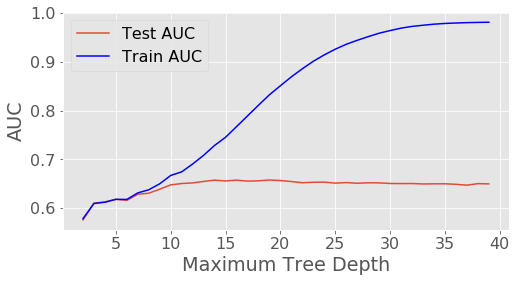

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,4))
plt.plot(auc[:,0], auc[:,1], label='Test AUC') 
plt.plot(auc[:,0], auc[:,2], color='b', label='Train AUC')
plt.legend()
plt.xlabel('Maximum Tree Depth')
plt.ylabel('AUC')

plt.show()

### 전체 데이터로 분류 나무 형성

### 독립변수

In [0]:
X=b2.drop(['T01'], axis=1)

### 종속변수

In [0]:
y=pd.DataFrame(b2['T01'])

### 종속변수를 종속변수의 중앙값을 기준으로 이분화 변수로 변경

In [0]:
y=binarizer.transform(y)  #1과 0으로 이루어진 종속 변수 생성
y=pd.DataFrame(y)

In [0]:
y.rename(columns={0: 'T01_b'}, inplace=True)

In [0]:
y.head()

,T01_b
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


## 분류 나무 형성

In [0]:
dt = DecisionTreeClassifier(max_depth=14, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

### 분류 나무의 시각화

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn import tree
import graphviz

In [0]:
x_features2=X.columns
x_features2

Index(['IX_TB_THK', 'TG_MI_OS_MIN', 'ACT_RANK_SUMLEN', 'MOM_PLT_WTH'], dtype='object')

In [0]:
#의사결정나무 그래프
dtg=tree.export_graphviz(dt,feature_names=x_features2, 
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dtg)
graph.render("dtg") 

'dtg.pdf'

## 부록

### 비용-비효율 조건 중 정말 비용-비효율인 조건을 잡아내기

In [0]:
b3=b2[(b2["IX_TB_THK"] > 60) & (b2["MOM_PLT_WTH"] <= 4389.5)]
b3_train,b3_test=train_test_split(b3,test_size=0.3,random_state=0)
print(b3_train.shape[0])
print(b3_test.shape[0])

5604
2402


### threshold로 지정할 종속변수의 중앙값 찾기

In [0]:
b3.describe()

,IX_TB_THK,TG_MI_OS_MIN,ACT_RANK_SUMLEN,MOM_PLT_WTH,T01
count,8006.000000,8006.000000,8006.000000,8006.000000,8006.000000
mean,111.324007,75.918208,7987.927429,2656.522983,0.346852
std,52.740707,31.021709,3080.356337,491.198095,0.324523
min,70.000000,0.000000,3000.000000,1529.000000,-1.080000
25%,70.000000,59.860000,6096.000000,2491.000000,0.150000
50%,100.000000,70.480000,7040.000000,2503.000000,0.280000
75%,100.000000,90.357500,9700.000000,2762.000000,0.470000
max,200.000000,152.810000,20205.000000,4389.000000,2.740000


###종속변수를 종속변수의 중앙값을 기준으로 이분화 변수로 변경

In [0]:
binarizer2=Binarizer(threshold=0.28) # 중앙값이 0.28이므로 이 기준으로 1, 0
binarizer2

Binarizer(copy=True, threshold=0.28)

### 학습, 검증, 평가 집합 형성

In [0]:
X_train2=b3_train.loc[:,["IX_TB_THK","TG_MI_OS_MIN","ACT_RANK_SUMLEN","MOM_PLT_WTH"]]
y_train2=b3_train.loc[:,["T01"]]
y_train2=binarizer2.transform(y_train2) #1,0으로 바꾸기
y_train2=pd.DataFrame(y_train2)
X_test2=b3_test.loc[:,["IX_TB_THK","TG_MI_OS_MIN","ACT_RANK_SUMLEN","MOM_PLT_WTH"]]
y_test2=b3_test.loc[:,["T01"]]
y_test2=binarizer2.transform(y_test2)
y_test2=pd.DataFrame(y_test2)

### AUC 값으로 분류 나무의 max_depth 결정

In [0]:
#의사결정나무 깊이를 결정하기 위해 AUC 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
def get_aucs2(max_depth):
    dt2 = DecisionTreeClassifier(random_state=1, max_depth=max_depth)
    dt2.fit(X_train2, y_train2)
    #test AUC
    pred2=dt2.predict(X_test2)
    test_auc2=roc_auc_score(y_test2,pred2)
    #train AUC
    pred_train2=dt2.predict(X_train2)
    train_auc2=roc_auc_score(y_train2,pred_train2)
    return test_auc2,train_auc2
depth2 = np.arange(2, 40)
auc2 = np.zeros((len(depth2), 3))
for i2, val2 in enumerate(depth2):
    test_auc2, train_auc2 = get_aucs2(val2)
    auc2[i2, 0]  = val2
    auc2[i2, 1]  = test_auc2
    auc2[i2, 2]  = train_auc2

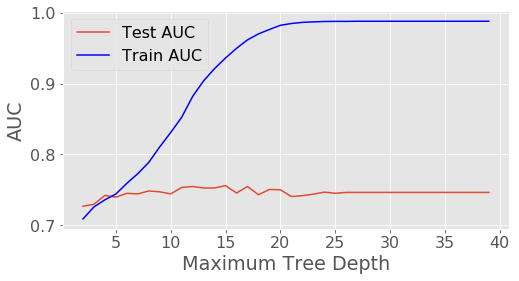

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,4))
plt.plot(auc2[:,0], auc2[:,1], label='Test AUC') 
plt.plot(auc2[:,0], auc2[:,2], color='b', label='Train AUC')
plt.legend()
plt.xlabel('Maximum Tree Depth')
plt.ylabel('AUC')

plt.show()

In [0]:
auc2

array([[ 2.        ,  0.72694606,  0.70905102],
       [ 3.        ,  0.72972892,  0.7259942 ],
       [ 4.        ,  0.74229756,  0.7360454 ],
       [ 5.        ,  0.73976844,  0.74415936],
       [ 6.        ,  0.74518649,  0.75932942],
       [ 7.        ,  0.74435663,  0.77291621],
       [ 8.        ,  0.74850319,  0.78893169],
       [ 9.        ,  0.74727676,  0.81074568],
       [10.        ,  0.74436079,  0.83107772],
       [11.        ,  0.75353161,  0.85252679],
       [12.        ,  0.75477953,  0.88195463],
       [13.        ,  0.75269759,  0.90392165],
       [14.        ,  0.75270105,  0.92125356],
       [15.        ,  0.75603092,  0.936259  ],
       [16.        ,  0.74562257,  0.94980834],
       [17.        ,  0.75478924,  0.96179046],
       [18.        ,  0.74313505,  0.97016713],
       [19.        ,  0.75063159,  0.97642118],
       [20.        ,  0.75021977,  0.98231477],
       [21.        ,  0.74064823,  0.9848237 ],
       [22.        ,  0.74189129,  0.986

### 분류 나무 형성

In [0]:
X2=b3.drop(['T01'], axis=1)
y2=pd.DataFrame(b3['T01'])
y2=binarizer2.transform(y2)  #1과 0으로 이루어진 종속 변수 생성
y2=pd.DataFrame(y2)
y2.rename(columns={0: 'T01_b'}, inplace=True)
y2.head()
dt3 = DecisionTreeClassifier(max_depth=15, random_state=99)
dt3.fit(X2, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

### 위에서 형성한 분류 나무의 시각화

In [0]:
#의사결정나무 그래프
dtg2=tree.export_graphviz(dt3,feature_names=x_features2, 
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dtg2)
graph.render("dtg2") 

'dtg2.pdf'